![titanic](https://faithmag.com/sites/default/files/styles/article_full/public/2021-08/titanic.jpg?h=5cc6d756&itok=qujOhbLw)

# Project Overview

In this project, we investigate the Titanic Dataset with the use of the Python libraries Scipy, NumPy, scikit-learn, Pandas, Matplotlib and Seaborn

## Dataset Information/ Data Dictionary/Variable Notes:

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. <br><br> On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. <br> <br> This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. <br> <br> Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

| Variables | Definition    | Key
| ----------- | ----------- | ----------- | 
| Survived | Survival | 0 = No, 1 = Yes
| Pclass   | Ticket class| 1 = First Class, 2 = Second Class, 3 = Third Class
| Sex |  Sex| 0 = Male. 1 = Female
| Age |  Age in years | 
| Sibsp| No. of siblings / spouses aboard the Titanic 
| Parch | No. of parents / children aboard the Titanic
| Ticket| Ticket number
| Fare | Passenger fare
| Cabin | Cabin number
| Embarked | Port of Embarked | C = Cherbourg, Q = Queenstown,S = Southampton


**Pclass:** A proxy for socio-economic status (SES) <br>
1st = Upper
2nd = Middle
3rd = Lower

**Age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**Sibsp:** The dataset defines family relations in this way: <br>
Sibling = brother, sister, stepbrother, stepsister <br>
Spouse = husband, wife (mistresses and fiancés were ignored)

**Parch:** The dataset defines family relations in this way: <br>
Parent = mother, father <br>
Child = daughter, son, stepdaughter, stepson <br>
Some children travelled only with a nanny, therefore parch=0 for them.

## Importing the libraries required for the assignment

In [377]:
# Import Necessary libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from scipy.stats import chi2_contingency

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-ticks')

SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# I will keep the resulting plots
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

# We want to see whole content (non-truncated)
pd.set_option('display.max_colwidth', None)

print('setup complete')

setup complete


## Reading our dataset

In [378]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [379]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [380]:
train.shape

(891, 12)

In [381]:
test.shape

(418, 11)

In [382]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [383]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Features: The titanic dataset has roughly the following types of features:

**Categorical/Nominal**: Variables that can be divided into multiple categories but having no order or priority. <br>
Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)

**Binary**: A subtype of categorical features, where the variable has only two categories. <br>
Eg: Sex (Male/Female)

**Ordinal**: They are similar to categorical features but they have an order(i.e can be sorted). <br>
Eg. Pclass (1, 2, 3)

**Continuous**: They can take up any value between the minimum and maximum values in a column. <br>
Eg. Age, Fare

**Count**: They represent the count of a variable. <br>
Eg. SibSp, Parch 

In [384]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [385]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [386]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [387]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


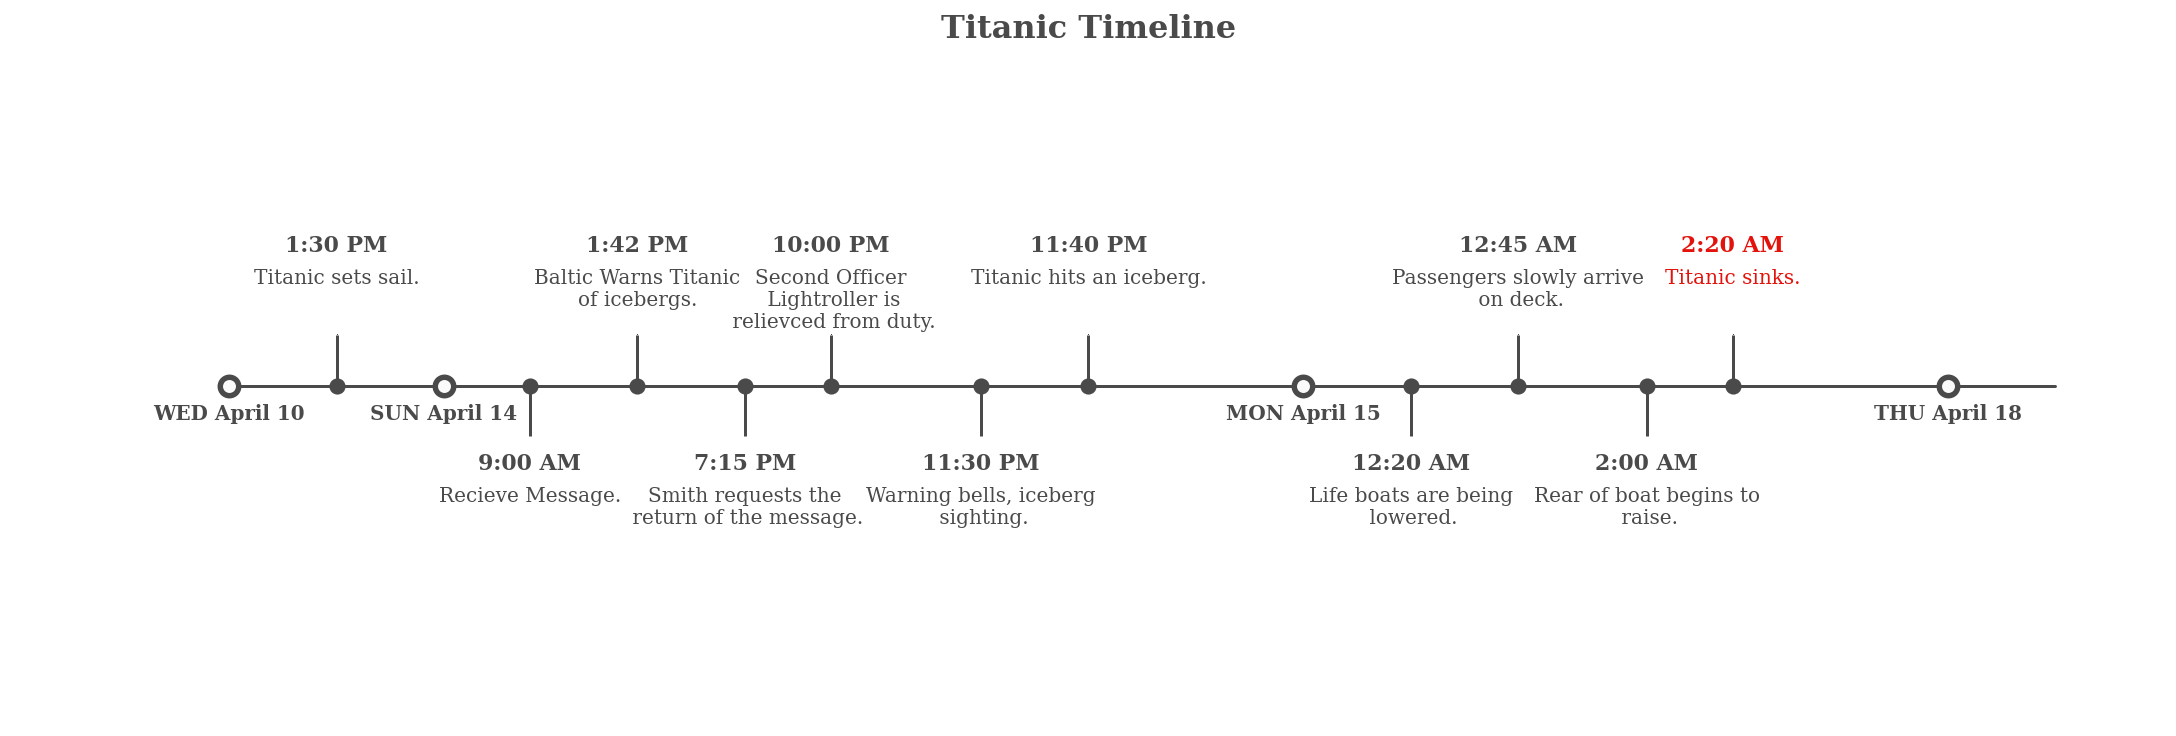

In [388]:
from datetime import datetime


tl_dates = [
    "WED April 10",
    "SUN April 14",
    "MON April 15",
    "THU April 18"
]

tl_x = [1, 2, 6, 9]

tl_sub_x = [1.5, 2.4, 2.9, 3.4, 3.8, 4.5, 5.0, 6.5, 7, 7.6, 8]
tl_sub_times = [
    "1:30 PM",
    "9:00 AM",
    "1:42 PM",
    "7:15 PM",
    "10:00 PM",
    "11:30 PM",
    "11:40 PM",
    "12:20 AM",
    "12:45 AM",
    "2:00 AM",
    "2:20 AM",
]

tl_text = [
    "Titanic sets sail.",
    "Recieve Message.",
    "Baltic Warns Titanic\nof icebergs.", 
    "Smith requests the\n return of the message.",
    "Second Officer\n Lightroller is\n relievced from duty.",
    "Warning bells, iceberg\n sighting.",
    "Titanic hits an iceberg.",
    "Life boats are being\n lowered.",
    "Passengers slowly arrive\n on deck.",
    "Rear of boat begins to\n raise.",
    "Titanic sinks."
]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
ax.set_ylim(-2, 2)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)
# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.2, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a')
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Titanic Timeline", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')

plt.show()

The above graph is a representation of the Timeline at which the Titanic ship sail to the time it sank.  

# 1. Exploratory Data Analysis

We begin with missing data in our train dataset


In [389]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The columns having null values are: Age, Cabin, Embarked. They need to be filled up with appropriate values later on.



From the output, we could observe that the train dataset a total null values of 866. The breakdown is as follows:

Emnarked: 2
Aged: 177
Cabin: 687

It is observed the Cabin has the most missing values in our train dataset. This can be visualised using a heat map to represent the above assumption:

<AxesSubplot:>

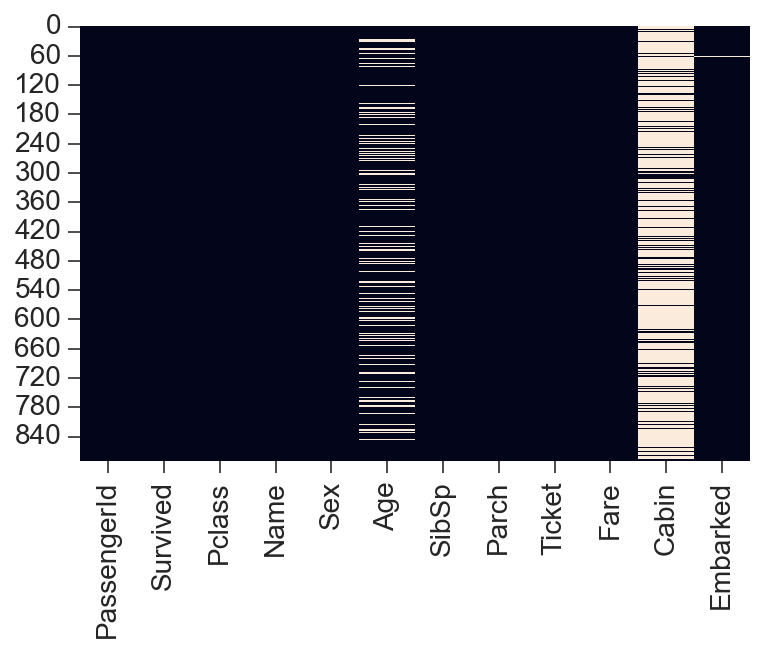

In [390]:
sns.heatmap(train.isnull(), cbar=False)

Against Index, we can infer that:

Age column has missing values with variation in occurrence, Cabin column are almost filled with missing values with variation in occurrence, hence it has the highest missing values; and Embarked column has few missing values in the beginning part.

This heatmap visualization immediately tells us such tendency. Also, if more than 2 columns have correlation in missing value locations, such correlation will be visualized. (Again, not the case for this dataset, but it is important to know the fact that there is no such correlation in this dataset).

We chose to explored further by employing missingno.matrix in seaborn heatmap to represent same information above.

<AxesSubplot:>

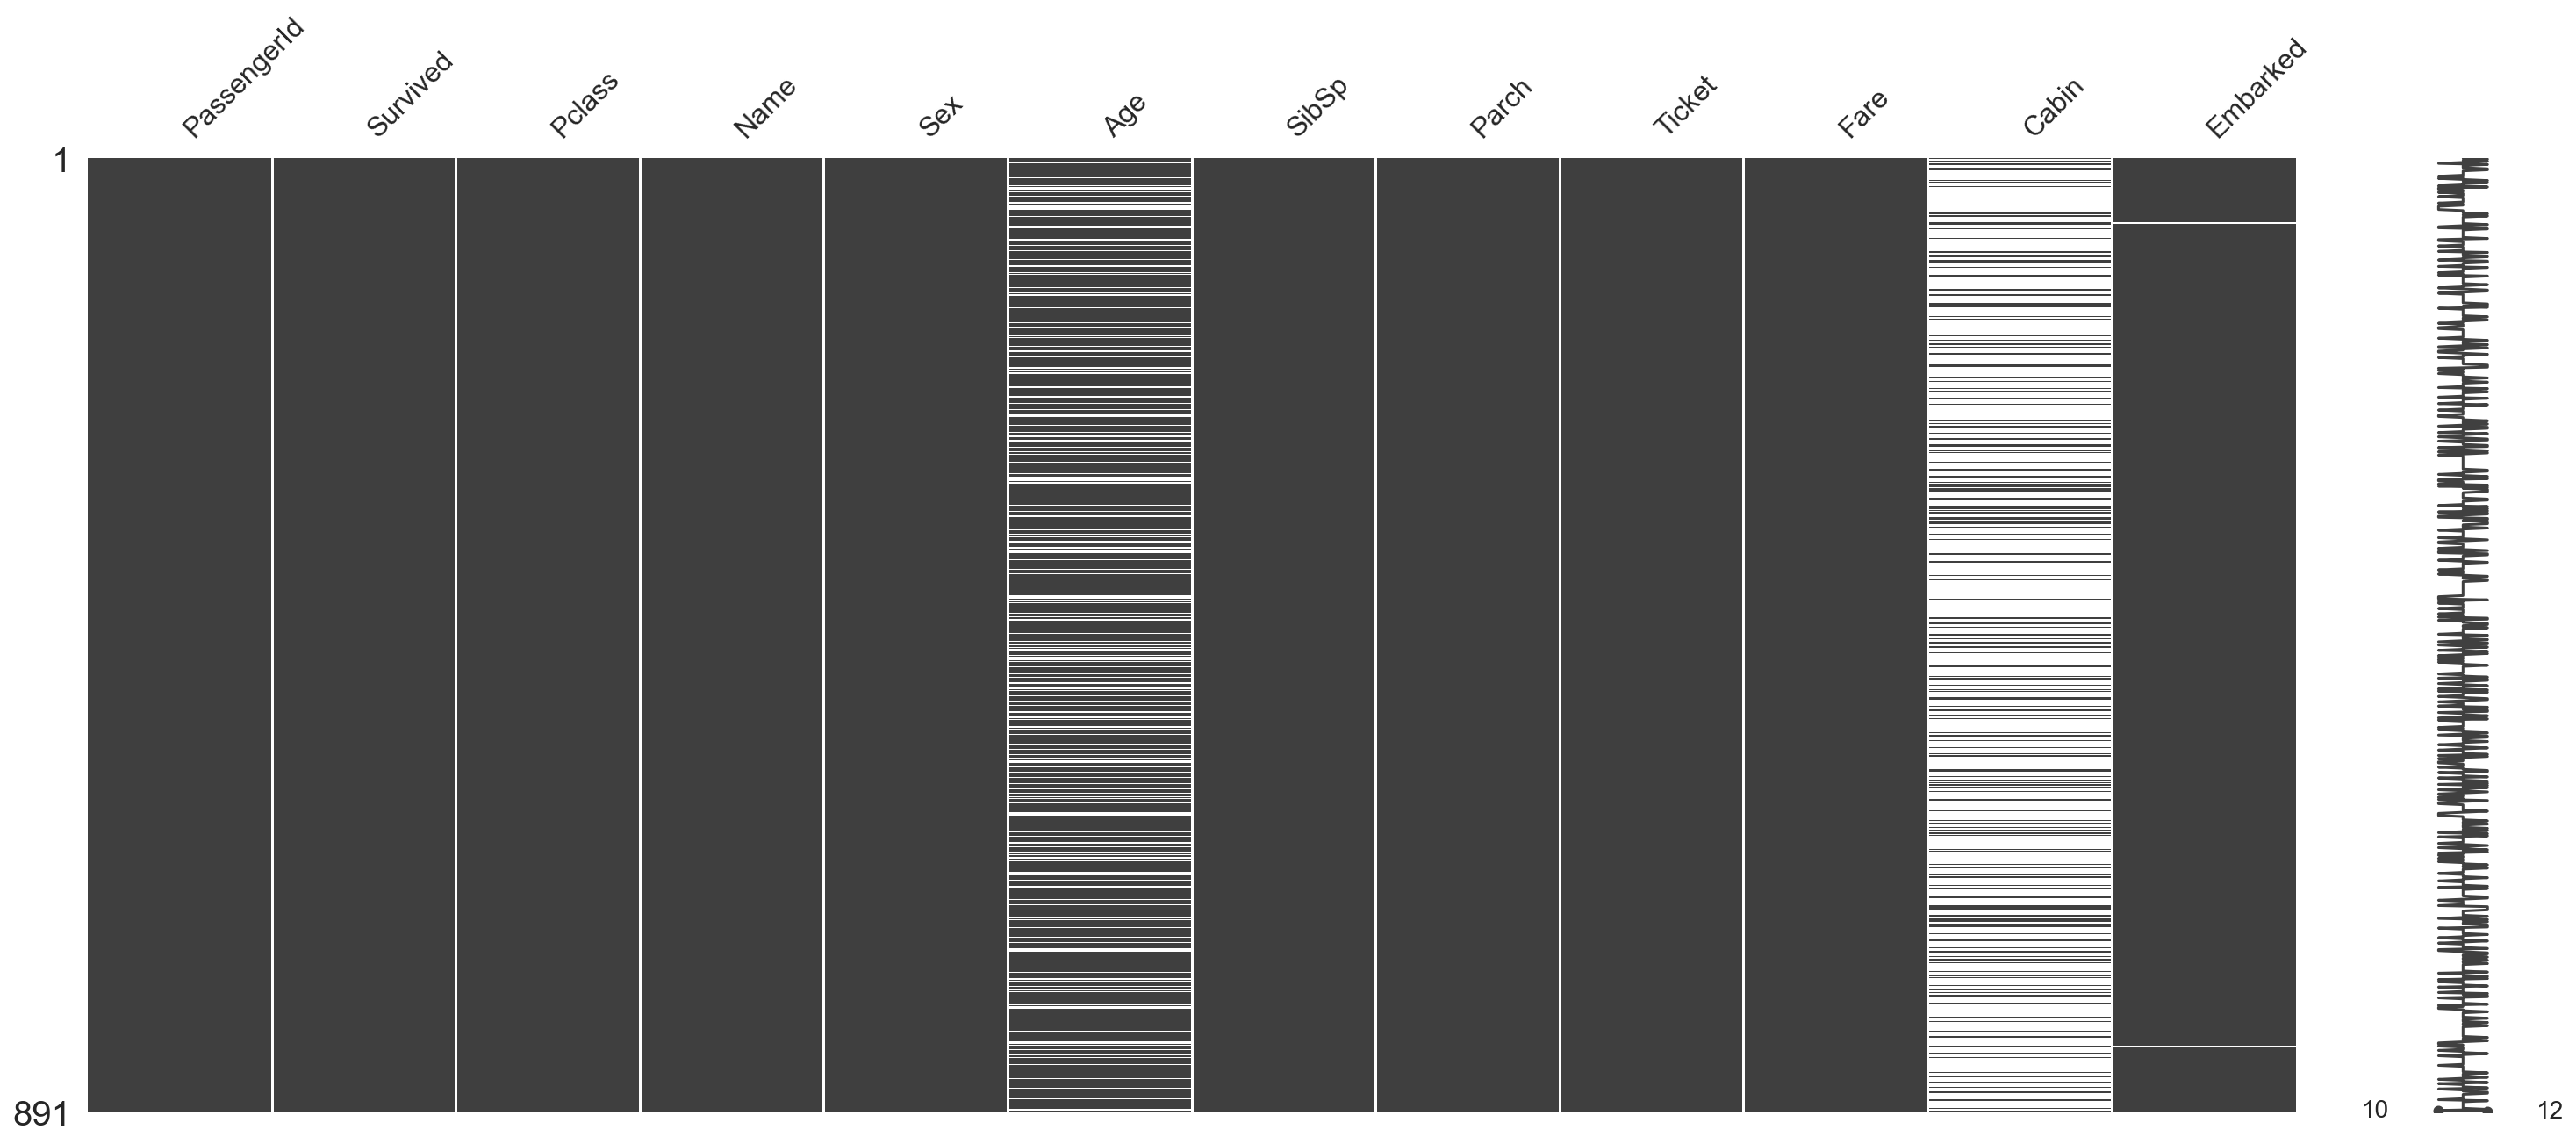

In [391]:
msno.matrix(train)


A matrix tells us exactly where the missing values are, in our example, the data is sorted with the newest records on top.

We can already have some valuable insights by looking at the matrix and knowing how our data is arranged.

Also, bar graph appears on the right side of this diagram in addition to the heatmap.

We can also employ the missingno.heatmap to visualise the correlation matrix about the locations of missing values in columns. 



<AxesSubplot:>

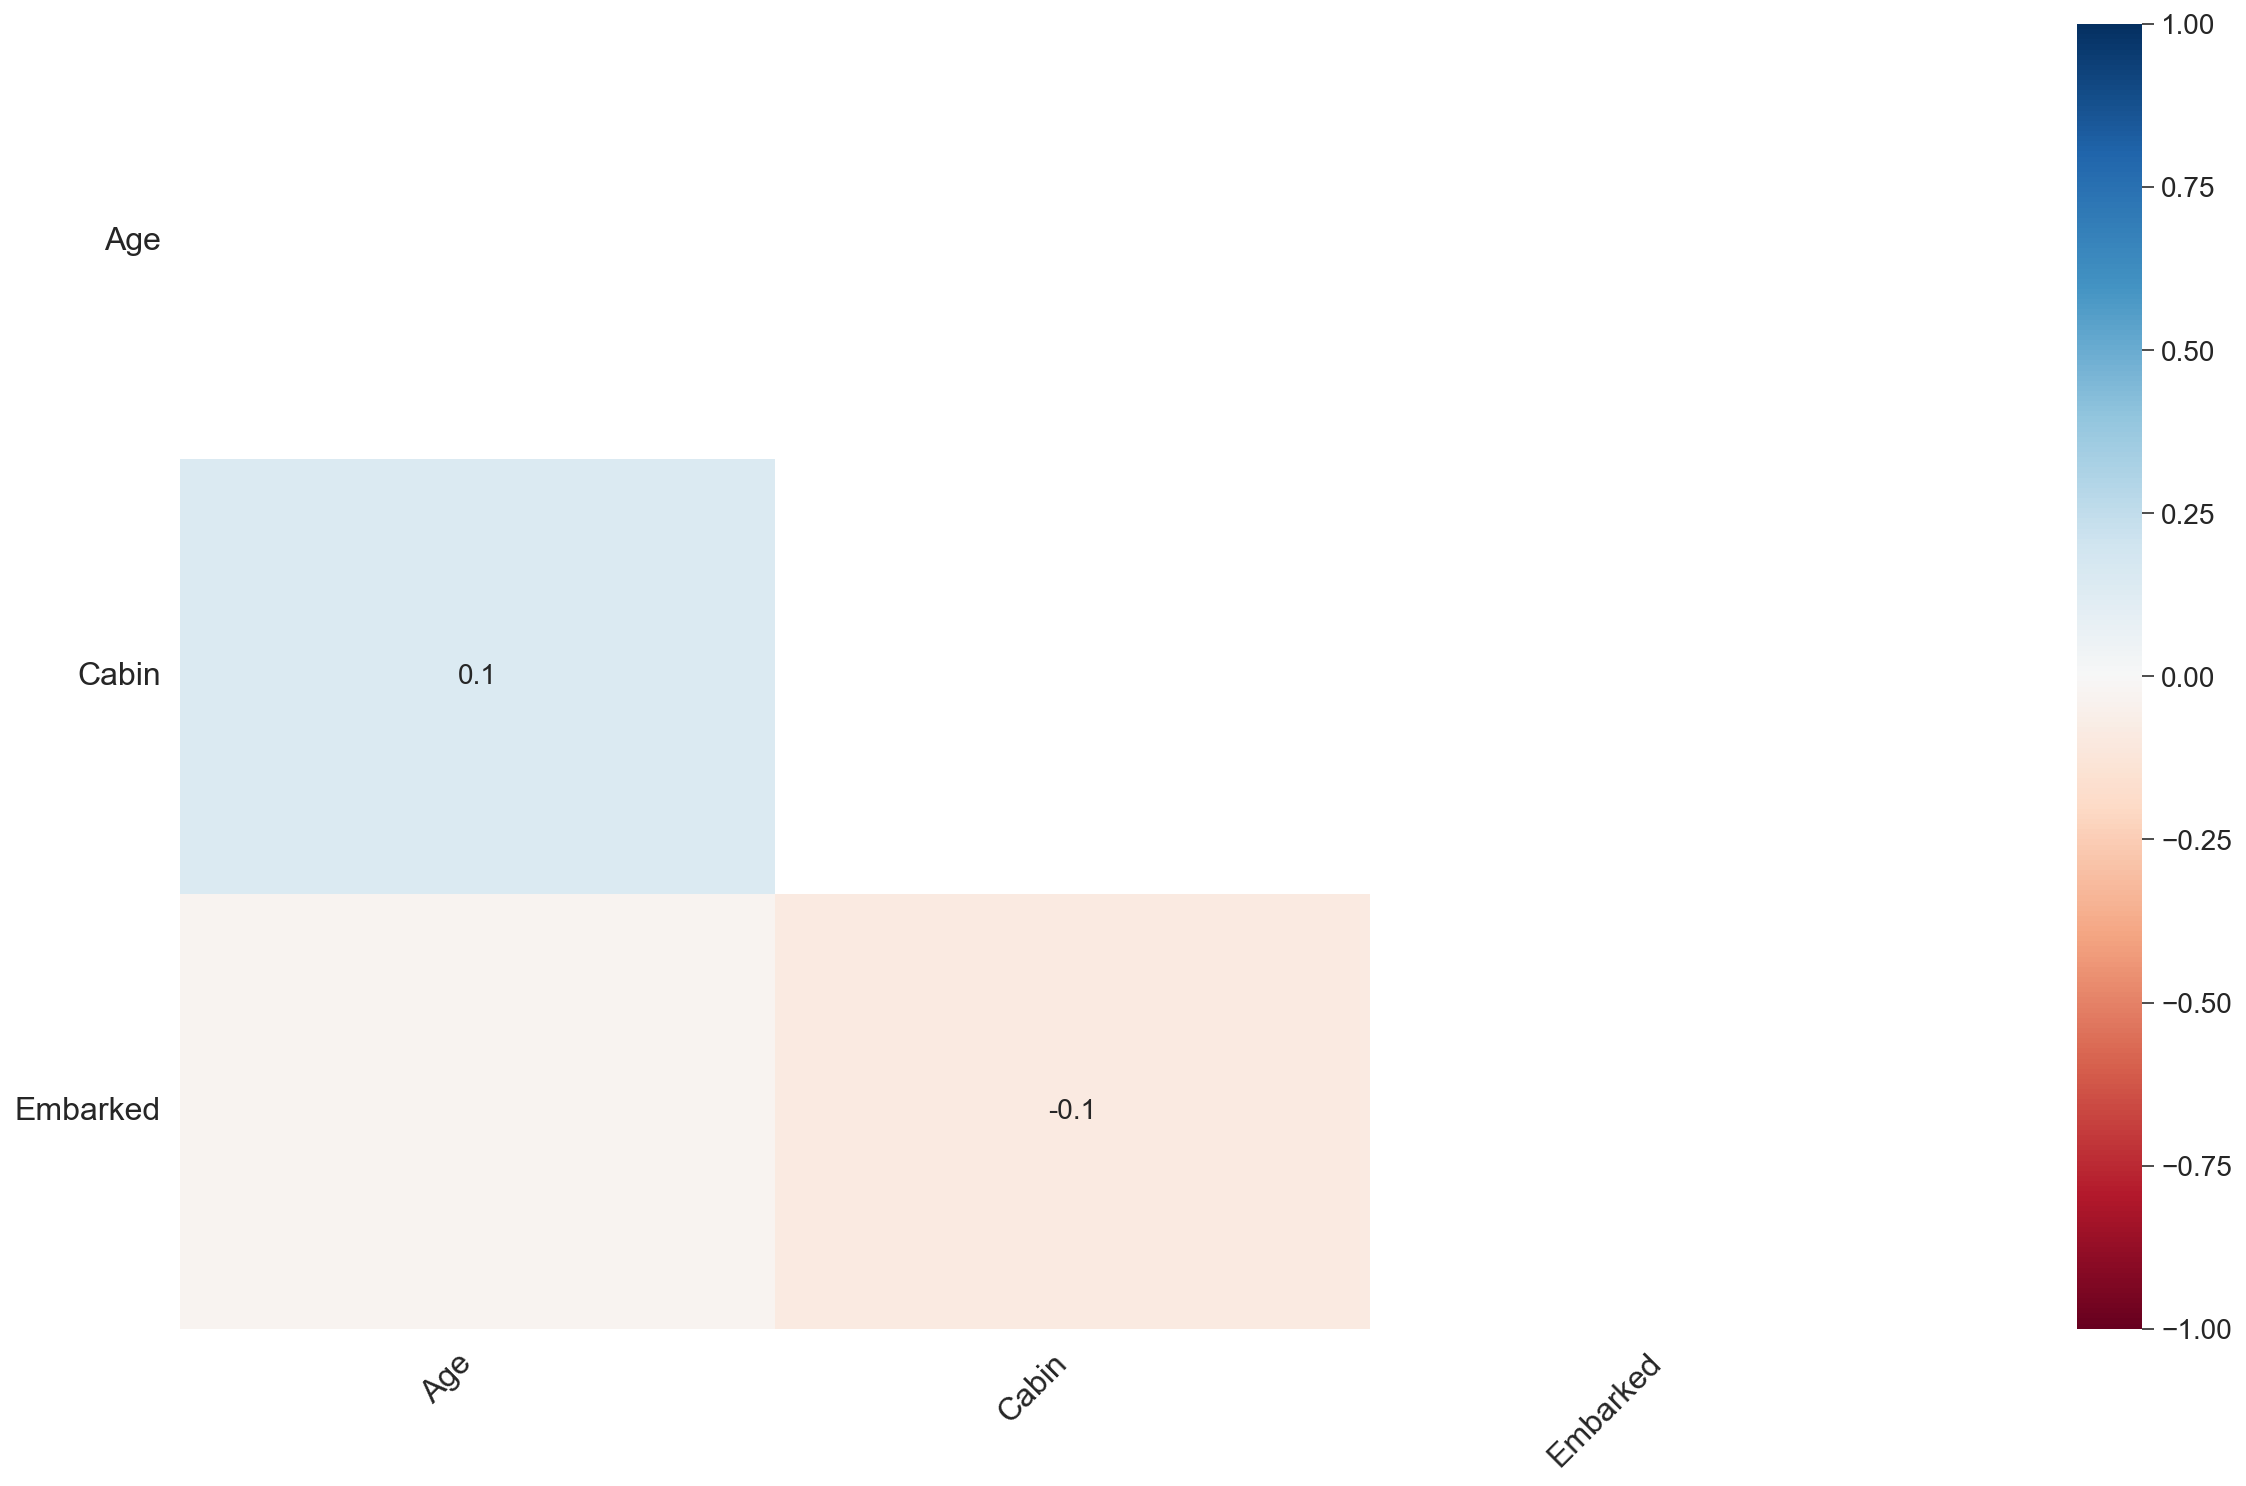

In [392]:
msno.heatmap(train)


We then agreed to visualise the number of missing values using a simple bar chart.

<AxesSubplot:>

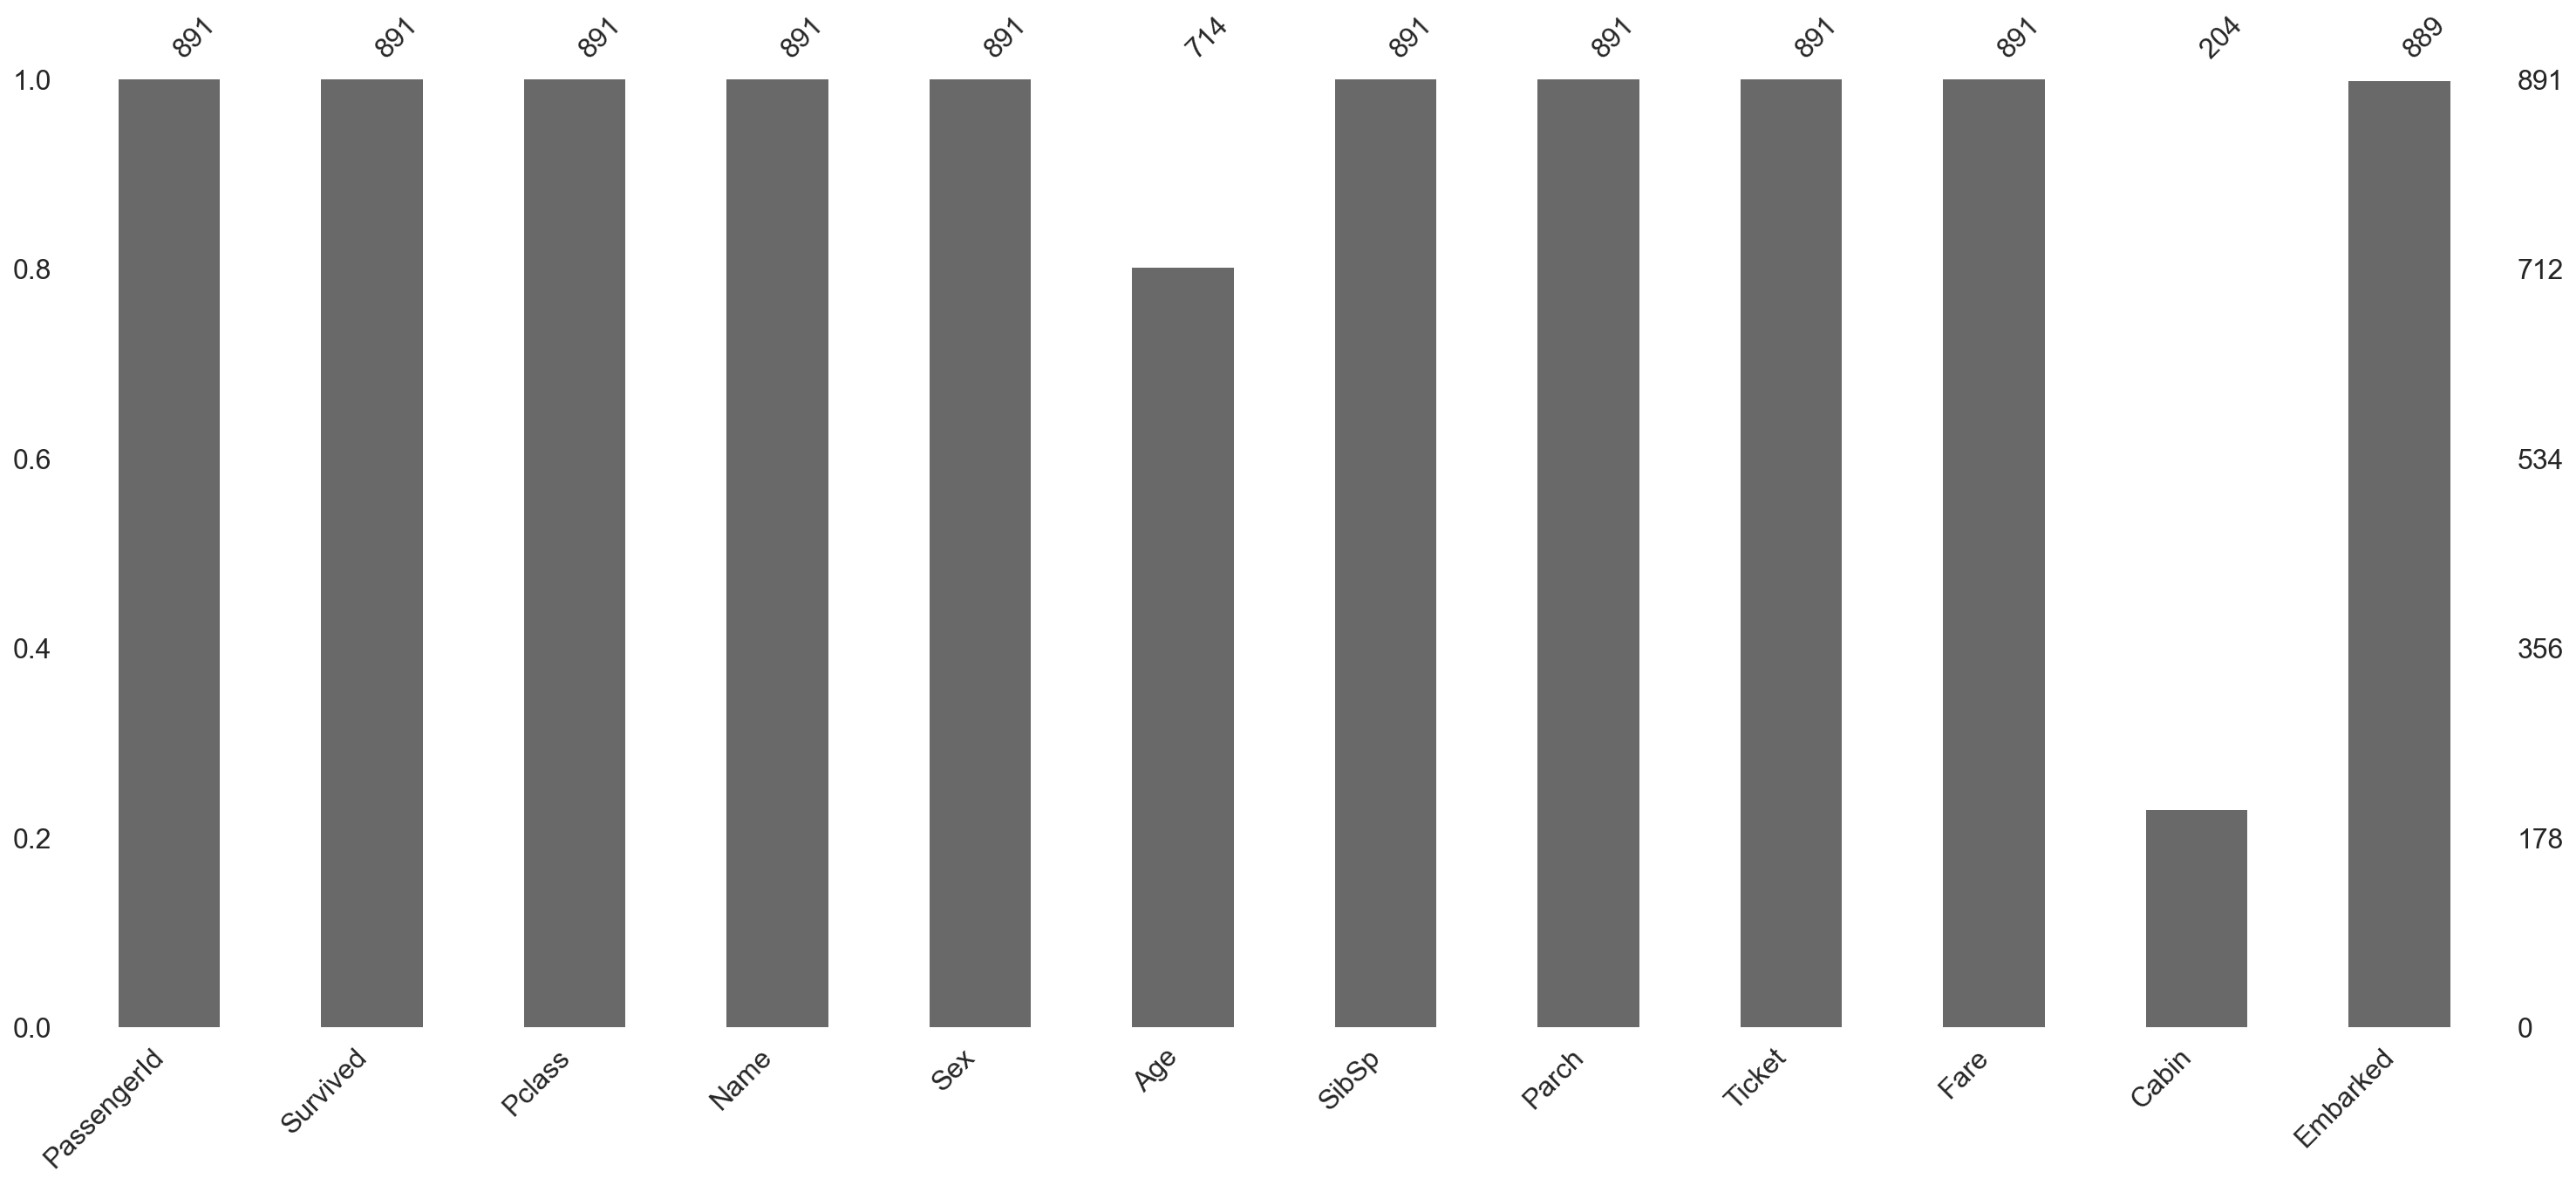

In [393]:
msno.bar(train)

A bit of clustering using a Dendrograms:

The dendrogram uses a hierarchical clustering algorithm to bin the fields by their correlation. the relationship we saw with the heatmaps.

It helps to figure out which fields are highly related to each other in matters of nullity, then testing how those groups of variables relate to themselves and so on.

Here, we can see Ticket < Fare < Embarked < Age < Cabin in ascending order are higly correlated in magnitude of null values.

<AxesSubplot:>

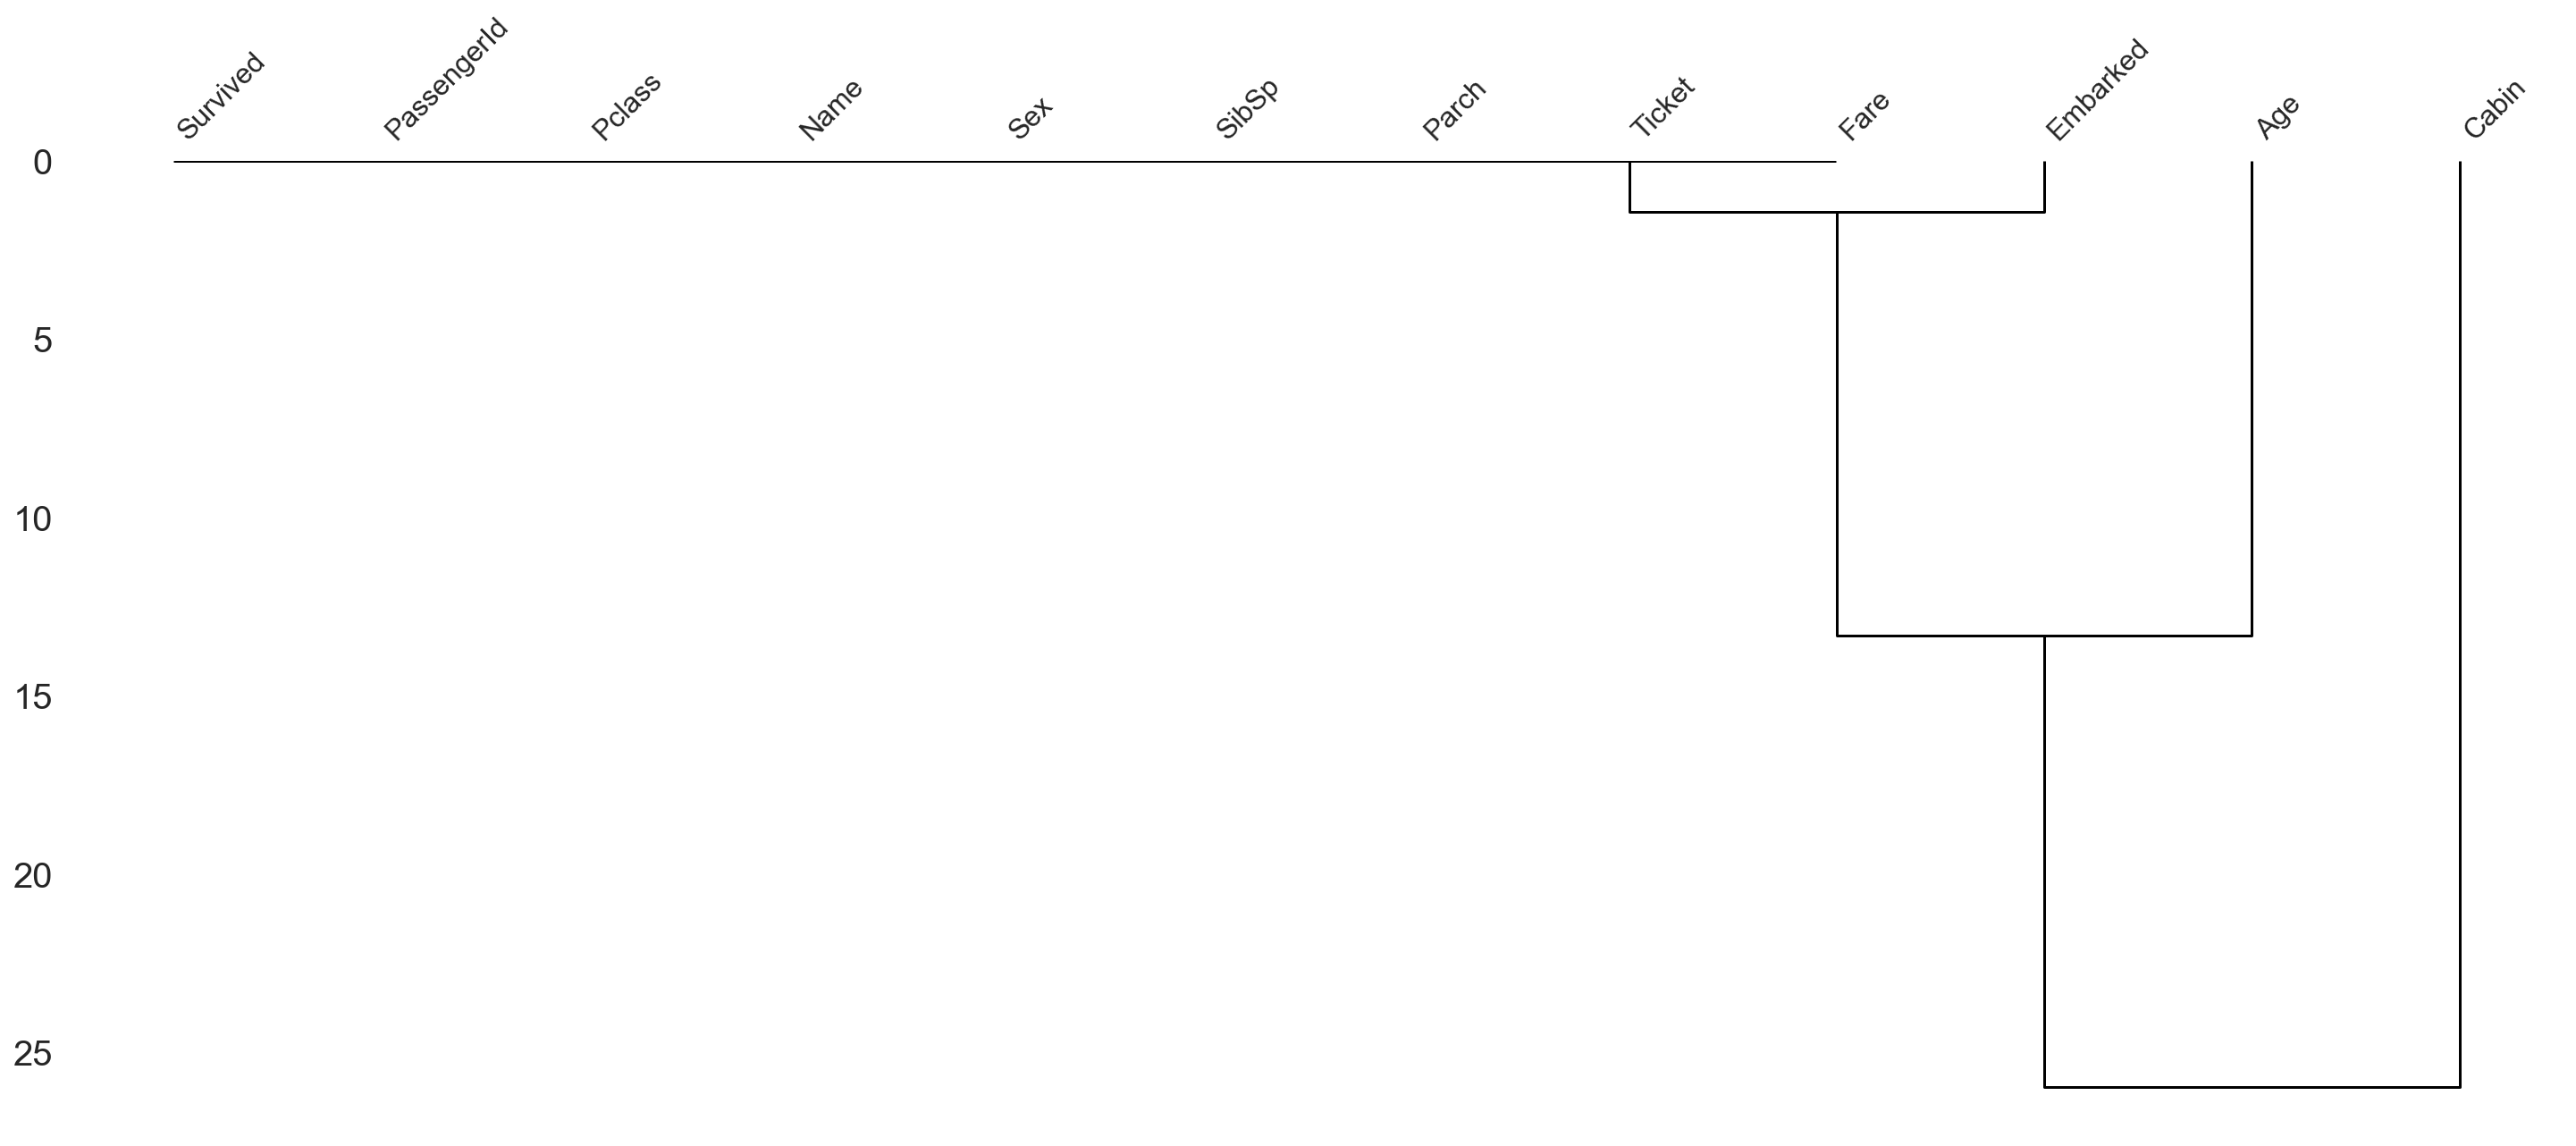

In [394]:
msno.dendrogram(train)

Not leaving the Test Dataset alone, we did a bit of exploration on it's missing data

In [395]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

From the output, we could observe that the test dataset a total null values of 414. The breakdown is as follows:

Fare: 1
Aged: 86
Cabin: 327

It is observed the Cabin has the most missing values in our test dataset. This can be visualised using a heat map:

<AxesSubplot:>

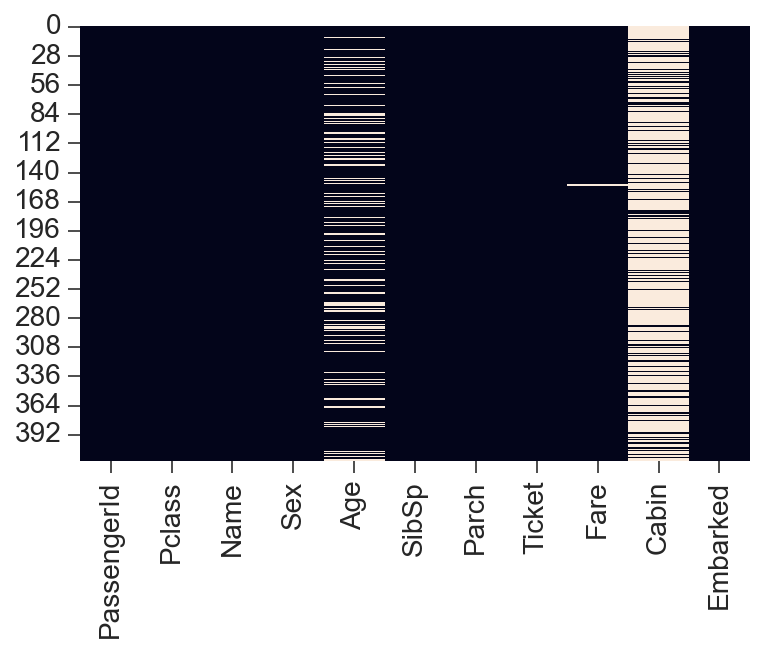

In [396]:
sns.heatmap(test.isnull(), cbar=False)

<AxesSubplot:>

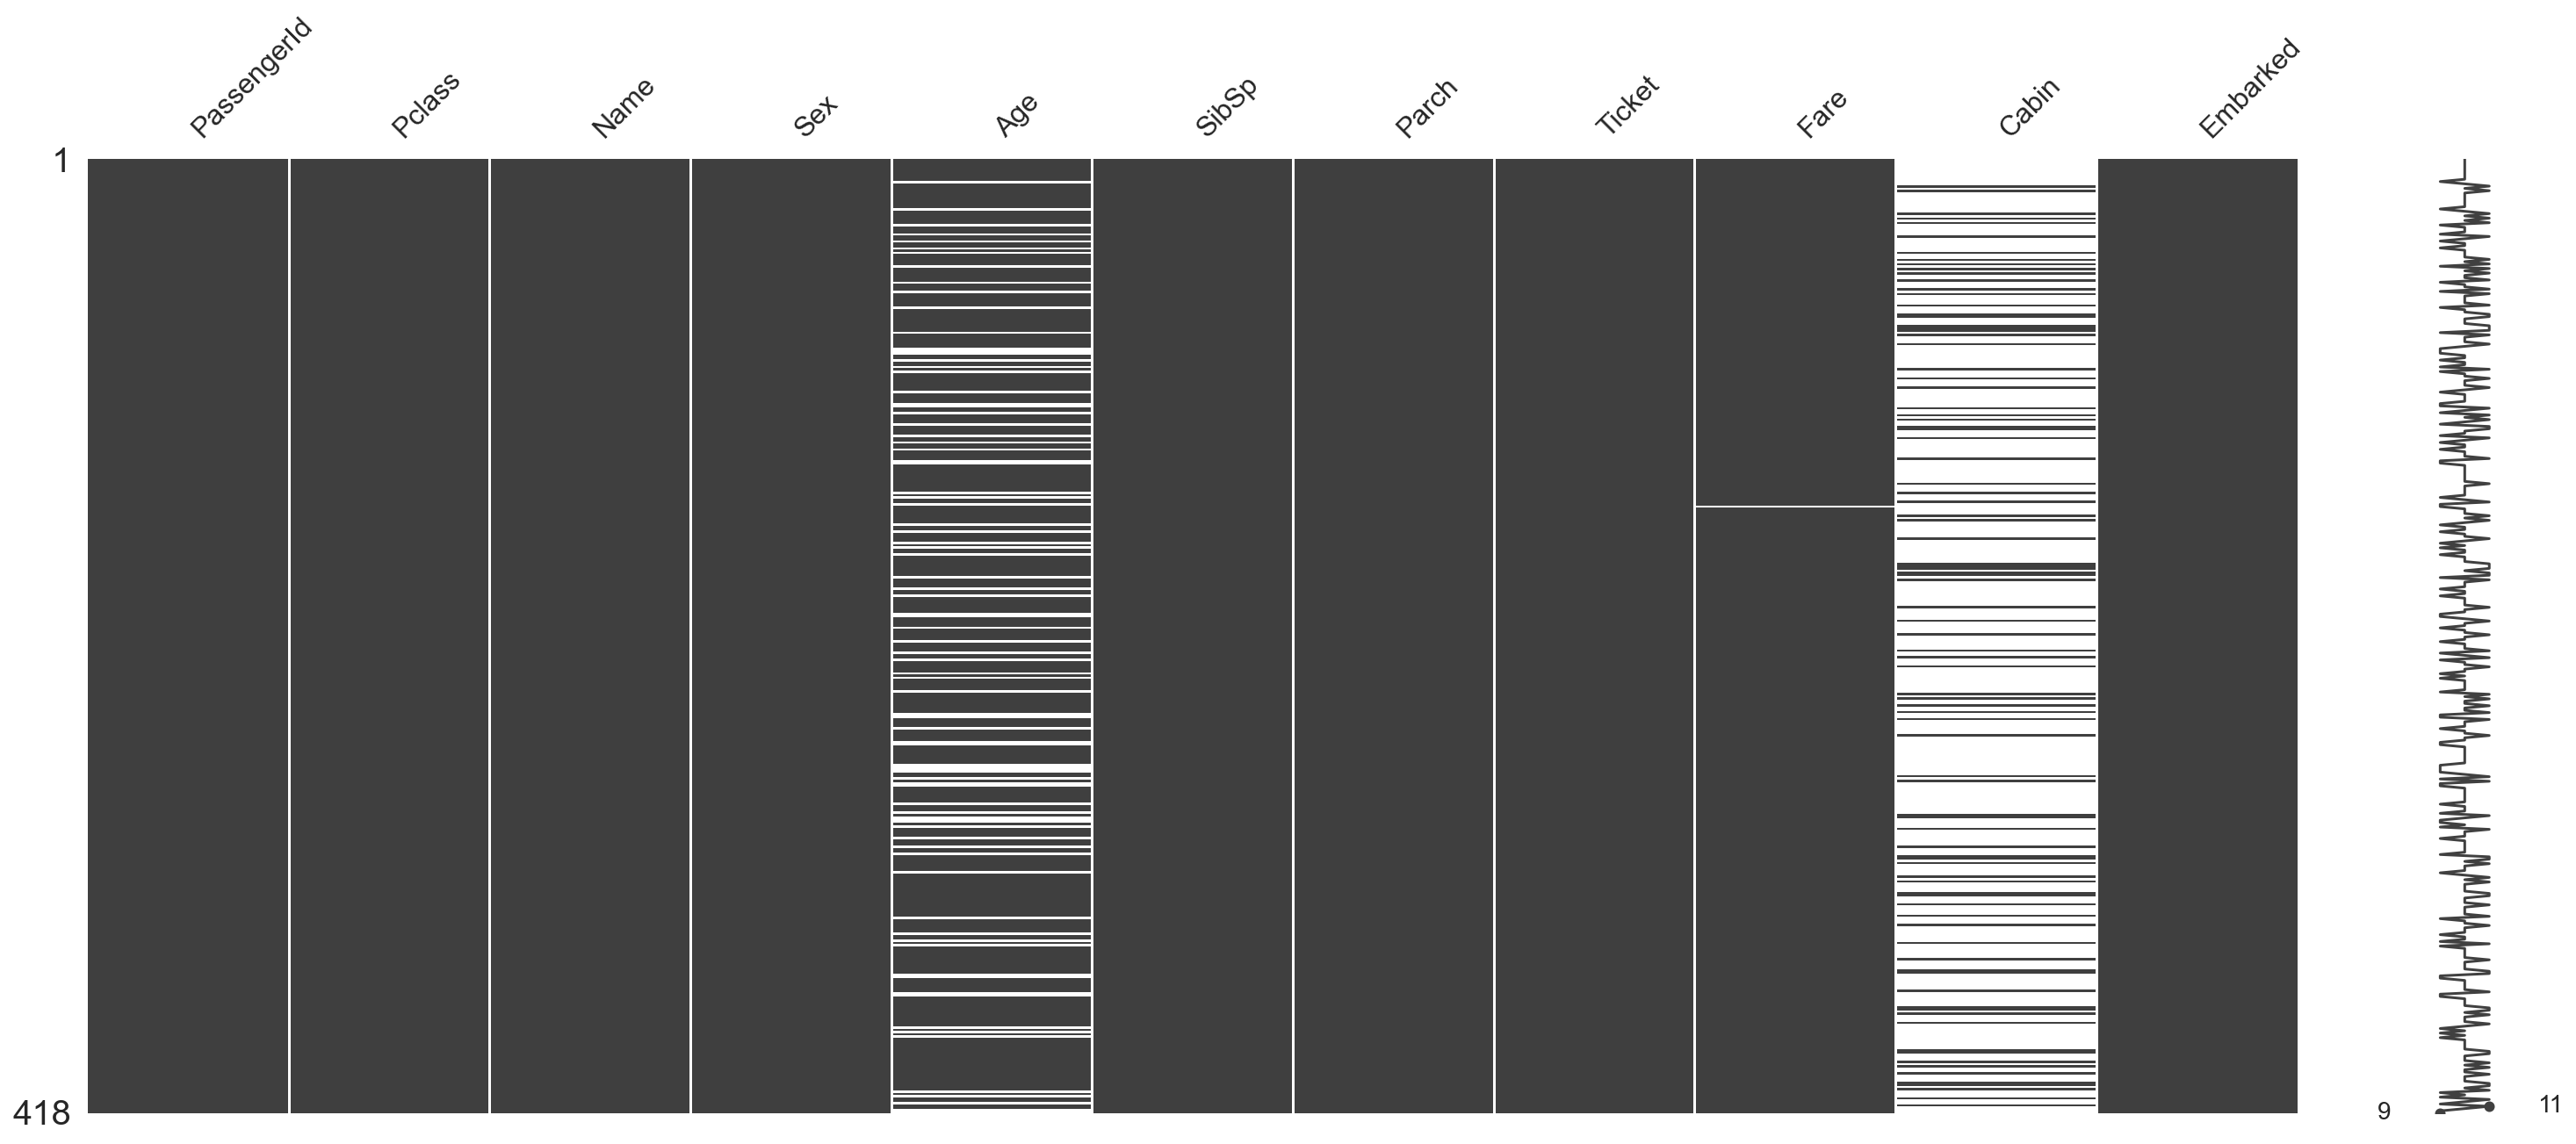

In [397]:
msno.matrix(test)


From the visuals above, we realised the missing values in Age Variable could be replaced since it is not that much compared to the missing values in the Cabin variable. <br><br>
Hence, we decided to replace the missing values in the Age variable by using the Mean Age of each class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

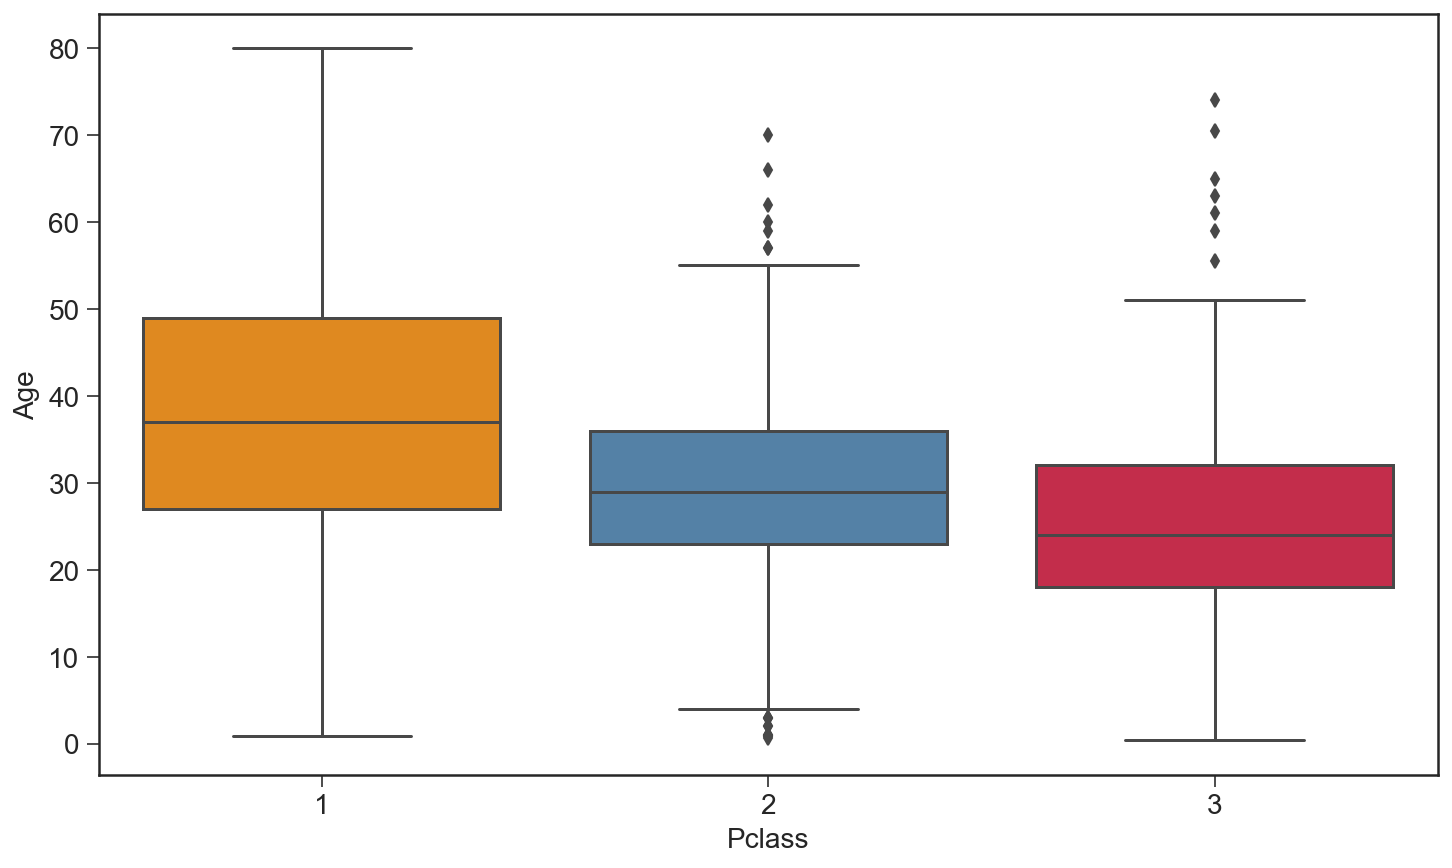

In [398]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train, palette=('darkorange','steelblue', 'crimson'))

In [399]:
# a function to imput the mean age into the missing values in the Age column.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [400]:
# Calling the function on the Age column
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
 

<AxesSubplot:>

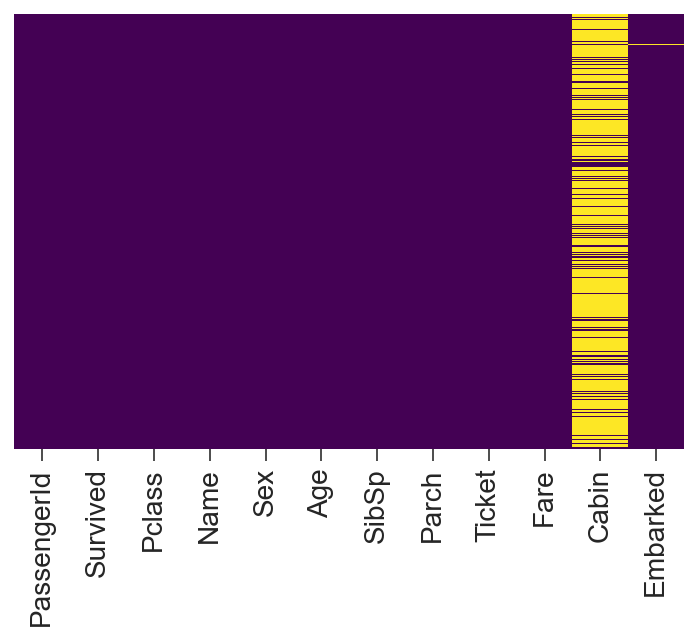

In [401]:
#A heatmap to confirm the missing values are imputed
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the heat map, its clear that there is no more missing values in the Age variable.

Checking to see if there are still some little amount of missing values in the Age variable.

In [402]:
# Print the number of missing values in Age column
print(train["Age"].isnull().sum())

0


We can now see that there are 0 missing values in Age column.

## We now explore the survival rate using the various objects in our dataset

#### Before we continue, we are making another copy of our dataframe and also create a function to aquire the composition of the variables per the passengers 

In [403]:
#Make another copy of the dataframe
descript = train.copy()

#Change the embarked keys to better readable ones
descript.loc[:,'Embarked'].replace(['C','S','Q'],
                                      ['Cherbourg','Southampton','Queenstown'],
                                      inplace=True)
#And the survived keys
descript.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

In [404]:
# Make a function to get the composition of the variables per number of passengers    
def Groupby_OneCol_comp_plot(train, col, plt_style = 'seaborn-ticks', color_palette = "coolwarm"):
    '''
    Group by col1, sort by size , return and plot the dataframe with a bar and pie plot
    '''
    gr=pd.DataFrame()
    gr['{} No'.format(col)] = train.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum())*100,0)
    
    print ('Total No. of {}:{}'.format(col,gr['{} No'.format(col)].sum()))
    
    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    
    fig=plt.figure()
    plt.axis('off')

    fig.add_subplot(121)
    
    ax=gr['{} No'.format(col)].plot(kind='bar', title='{} Counts'.format(col), figsize=(16,8), color=sns.color_palette())
    _ = plt.setp(ax.get_xticklabels(), rotation=0)
    for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2),
                                     (p.get_x()+p.get_width()/2., p.get_height()),
                                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.get_yaxis().set_ticks([])
    plt.xlabel('')

    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:,'{} Ratio'.format(col)].plot(kind= 'pie',
                                     autopct='%1.1f%%',shadow=False,
                                     title='{} Ratio'.format(col), legend=False, labels=None);
    sns.despine(top=True, right=True, left=True, bottom=False);

In [405]:
def plot(table, legloc='upper right',
                                    plt_style = 'seaborn-ticks',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                                    custom_title=None, minimal=True, figsize=(19,10), width=0.7 ):     
    grouped = table
    
    #Tranform to percentages
    if percentage == True:
        grouped = np.round(grouped.divide(grouped['Total'],axis=0)*100,0)
    try:   
        del grouped['Total']
    except:
        pass
    
    # rearrange the columns
    if sorter:
        grouped = grouped[sorter]

    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    ax = grouped.plot(kind=kind,stacked=stacked, figsize=figsize, width=width)
    _ = plt.setp(ax.get_xticklabels(), rotation=0)  # Rotate labels
    plt.legend(loc=legloc) # plot the legend normally
    
    #annotate the bars
    if percentage == True:
        for p in ax.patches:
            ax.annotate('{}%'.format(int(np.round(p.get_height(),decimals=2))),
                                        (p.get_x()+p.get_width()/2.,
                                        p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    else:
        for p in ax.patches:
            ax.annotate(np.round(p.get_height(),decimals=2),
                                        (p.get_x()+p.get_width()/2.,
                                        p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    if minimal == True:
        ax.get_yaxis().set_ticks([])
        plt.xlabel('')
        sns.despine(top=True, right=True, left=True, bottom=False);
    else:
        pass     
    # set custom title    
    plt.title(custom_title)
    
def Groupby_TwoCol_Plot(df, col1, col2, legloc='upper right',
                                    plt_style = 'ggplot',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                                    custom_title=None, minimal=True, figsize=(14,6), width=0.6):   
    
    #Group by Placement and Representative and unstack by Placement
    grouped = df.groupby([col2,col1]).size().unstack(col2)
    
    #Make a totals column sort and delete after
    grouped['Total'] = grouped.sum(axis=1)
    #grouped = grouped.sort_values('Total', ascending = False)
   
   
    plot(grouped, legloc=legloc,
                                    plt_style = plt_style,
                                    color_palette=color_palette,sorter=sorter, stacked=stacked,
                                    kind = kind , percentage = percentage,
                                    custom_title=custom_title, minimal=minimal, figsize=figsize, width=width)        

## Survived

Let's start with Survived column. It contains integer 1 or 0 which correspond to surviving ( 1 = Survived, 0 = Not Survived)

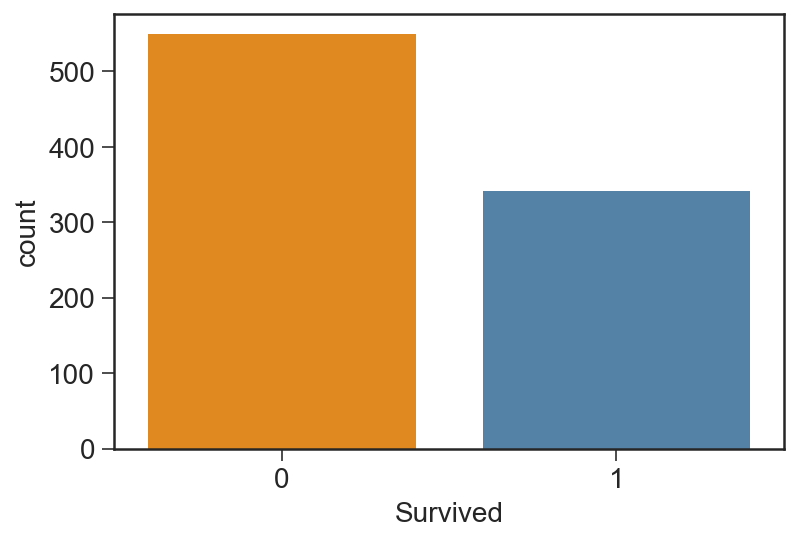

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [406]:
# Visualize with a countplot
sns.countplot(x="Survived", data=train)
plt.show()

# Print the proportions
print(train["Survived"].value_counts(normalize=True))

### Pclass (Ordinal Feature) vs Survived

Pclass column contains the socioeconomic status of the passengers. It might be predictive for our model  <br>
1 = Upper <br>
2 = Middle <br>
3 = Lower

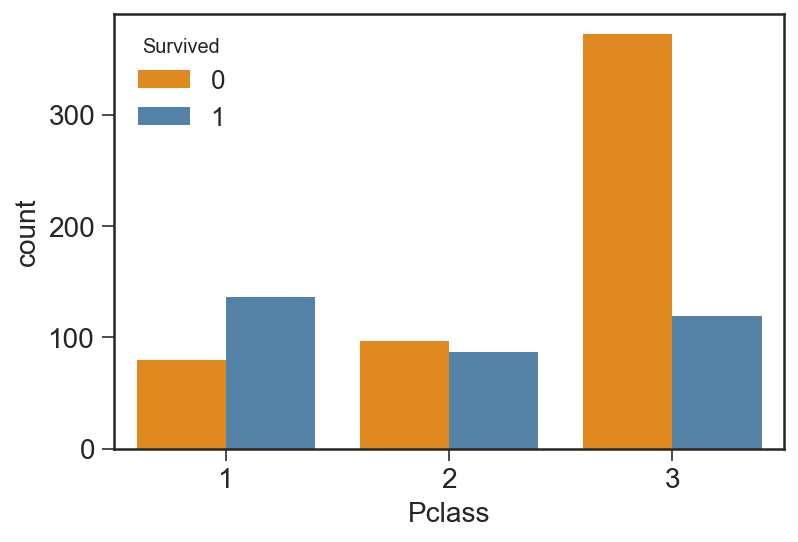

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [407]:
# Visualize with a countplot
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.show()

# Proportion of people survived for each class
print(train["Survived"].groupby(train["Pclass"]).mean())

# How many people we have in each class?
print(train["Pclass"].value_counts())

We decided to explore further to confirm if indeed our output is accurate by using a catplot, swarmplot and heat map from the searborn library which is built on the matpoltlib library.

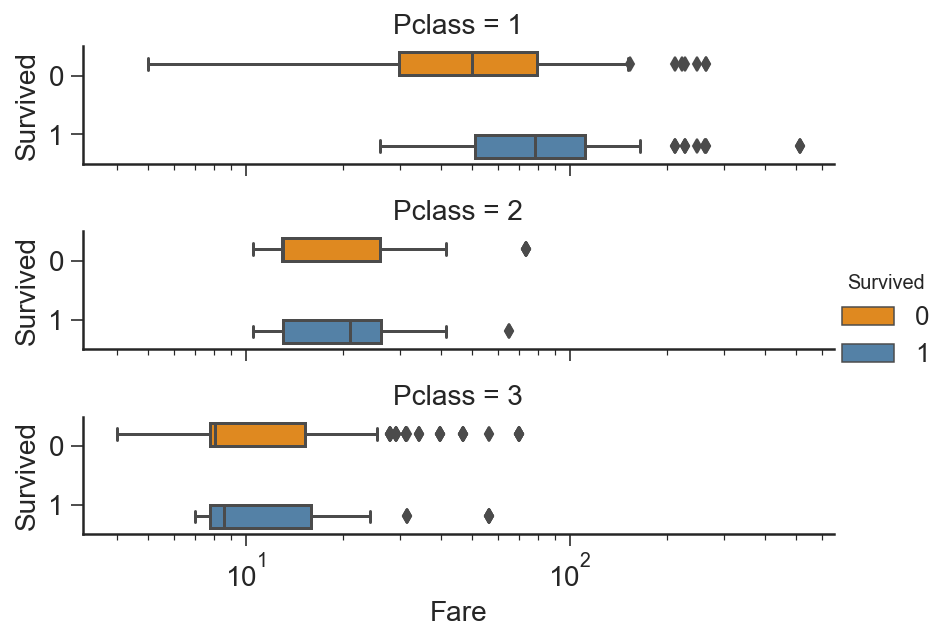

In [408]:
g = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient="h", hue="Survived",
                height=1.5, aspect=4,
                data=train.query("Fare > 0"))
g.set(xscale="log")

c:\Users\KWAME\anaconda3\envs\project\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\KWAME\anaconda3\envs\project\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

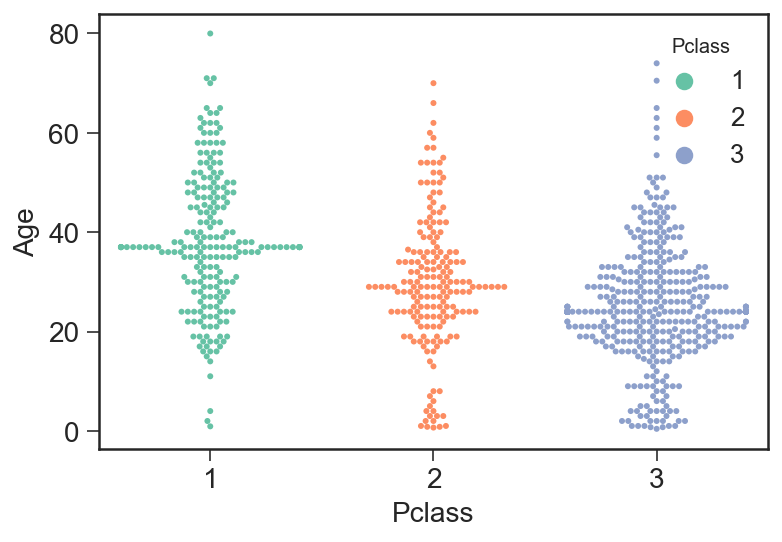

In [409]:
sns.swarmplot(x='Pclass', y='Age',hue='Pclass', size=3, data=train, palette='Set2')

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

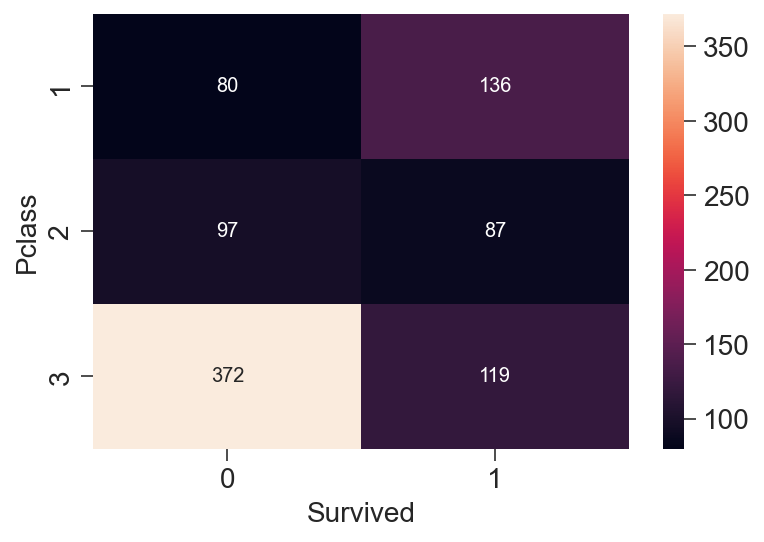

In [410]:
# Group the dataset by Pclass and Survived and then unstack them
group = train.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

We decided to explore the percentages of the survivability according to Pclass

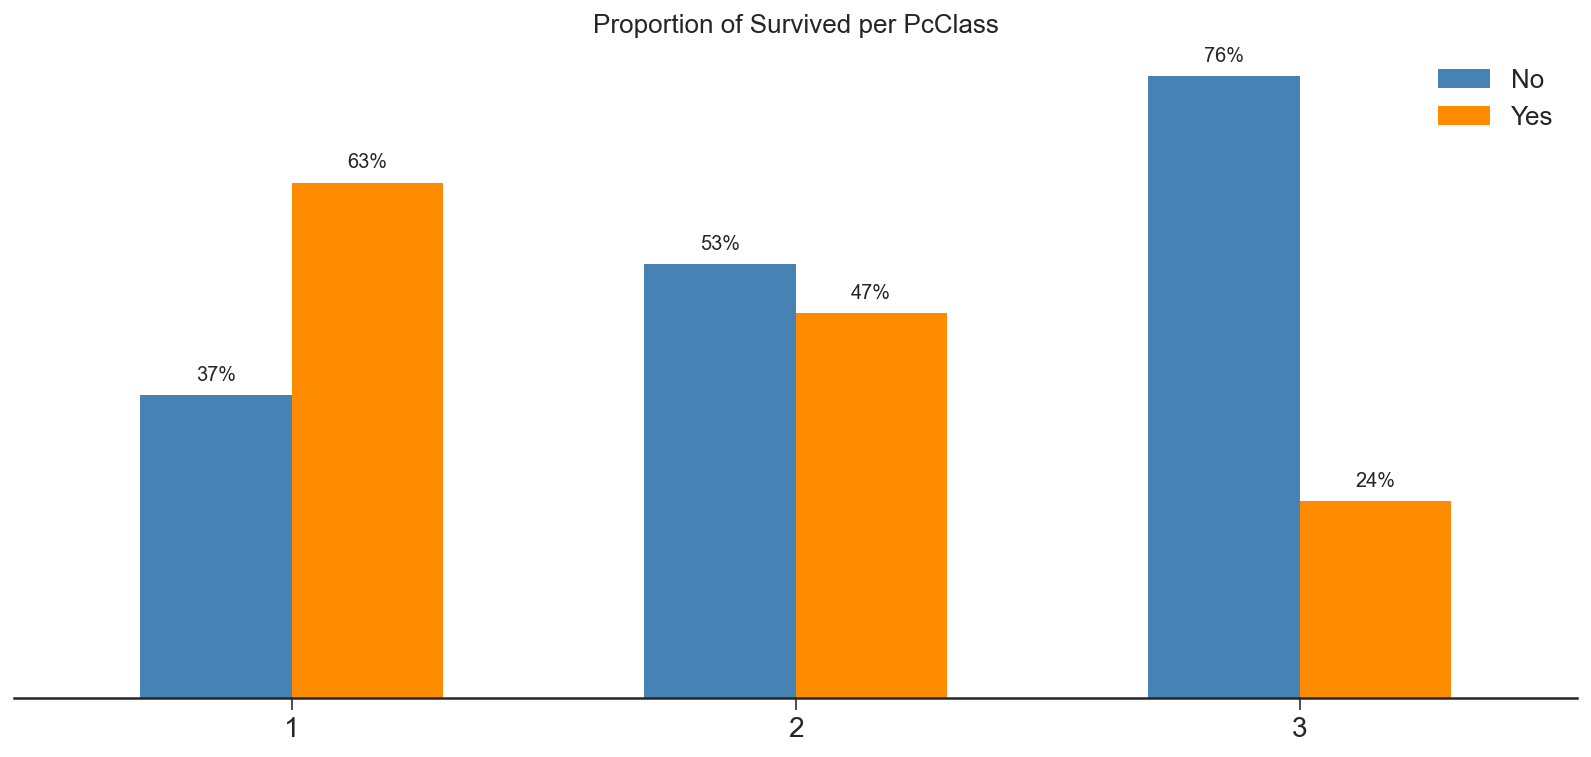

In [411]:
Groupby_TwoCol_Plot(descript,'Pclass', 'Survived', color_palette=('steelblue','darkorange'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Survived per PcClass')

Here, we can see that 63% of First class (1) passengers survived compared to 47% and 24% for the Second (2) and Third (3) class respectively.

It is obvious that survivability seems to correlate with the Pcclass and this could be the main factor behind the correlation with the port of embarkation as well.

Our output helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa.<br> Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

As I expected, first class passengers have higher surviving rate. We will use this information in our training data.

## Name

At a first glance, we thought that we would use the titles.

In [412]:
# Display first five rows of the Name column
display(train[["Name"]].head())

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


We can extract the titles from names.

In [413]:
# Get titles
train["Title"] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

# Print title counts
print(train["Title"].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


Is there any relationship between titles and surviving

In [414]:
# Print the Surviving rates by title
print(train["Survived"].groupby(train["Title"]).mean().sort_values(ascending=False))

Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64


Apparently, there is relationship between titles and surviving rate. We will group title by their surviving rates like following in the feature engineering part <br>

**higher**  = the Countess, Mlle, Lady, Ms , Sir, Mme, Mrs, Miss, Master <br>
**neutral** = Major, Col, Dr <br> 
**lower**   = Mr, Rev, Jonkheer, Don, Capt <br>

## Age

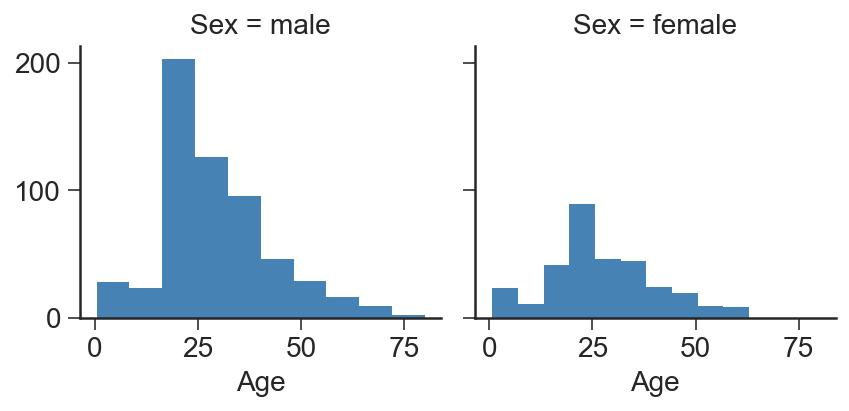

In [415]:
g = sns.FacetGrid(data=train, col='Sex')

g.map(plt.hist, 'Age')

The were obviously many young males btween 20 and 40 years on board.

c:\Users\KWAME\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\KWAME\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


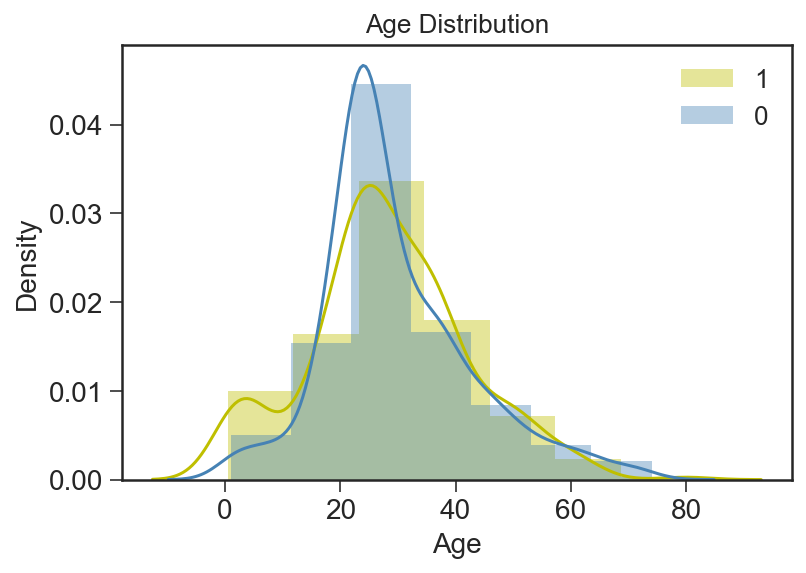

In [416]:
# Survived by age
sns.distplot(train[train.Survived==1]["Age"],color="y", bins=7, label="1")

# Death by age
sns.distplot(train[train.Survived==0]["Age"], bins=7, label="0")
plt.legend()
plt.title("Age Distribution")
plt.show()

We then have to dig deeper into this distrinution by using the seaborn voilinplot.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

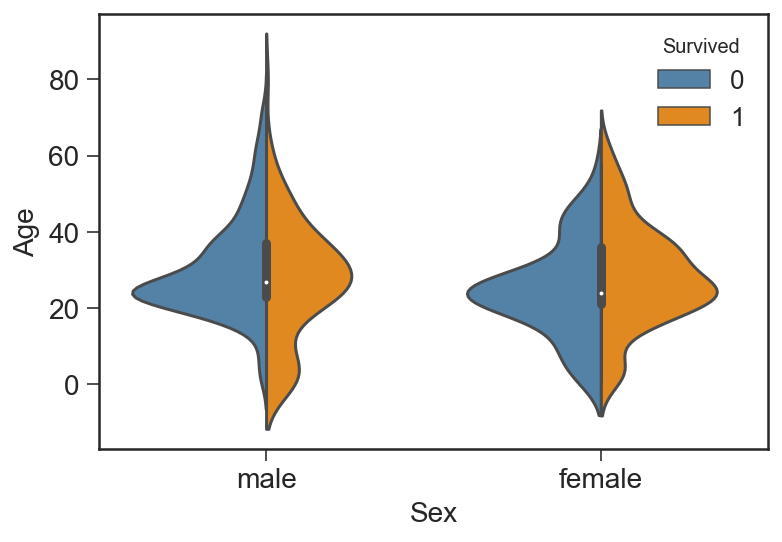

In [417]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train, split = True)

This graph demonstrates a summary of the age range of men, women and children who were saved. The survival rate is is detailed below:  

Good for children.
High for women in the age range 20-50.
Less for men as the age increases.
Since Age column is important, the missing values need to be filled later. 

## Sex

Is sex important for surviving?

We will begin by plotting the distribution of sex in our train dataset.

<AxesSubplot:xlabel='Sex', ylabel='count'>

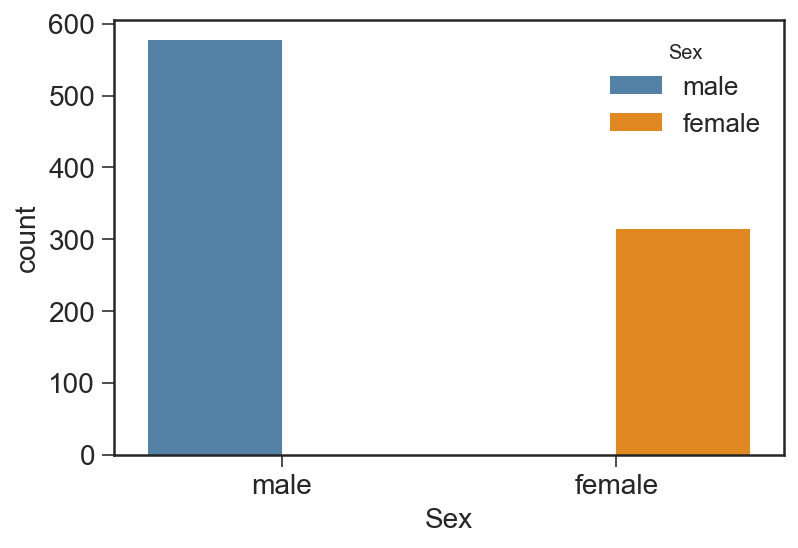

In [418]:
sns.countplot(x= 'Sex', data=train, hue= 'Sex')

We looked further with the percentages in the distribution

In [419]:
def plot(table, legloc='upper right',
                                    plt_style = 'seaborn-ticks',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(19,10), width=0.7 ):     
    grouped = table
    
    #Tranform to percentages
    if percentage == True:
        grouped = np.round(grouped.divide(grouped['Total'],axis=0)*100,0)
    try:   
        del grouped['Total']
    except:
        pass
    
    # rearrange the columns
    if sorter:
        grouped = grouped[sorter]

    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    ax = grouped.plot(kind=kind,stacked=stacked, figsize=figsize, width=width)
    _ = plt.setp(ax.get_xticklabels(), rotation=0)  # Rotate labels
    plt.legend(loc=legloc) # plot the legend normally
    
    #annotate the bars
    if percentage == True:
      for p in ax.patches:
            ax.annotate('{}%'.format(int(np.round(p.get_height(),decimals=2))),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    else:
      for p in ax.patches:
            ax.annotate(np.round(p.get_height(),decimals=2),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    if minimal == True:
        ax.get_yaxis().set_ticks([])
        plt.xlabel('')
        sns.despine(top=True, right=True, left=True, bottom=False);
    else:
        pass     
    # set custom title    
    plt.title(custom_title)
    
def Groupby_TwoCol_Plot(df, col1, col2, legloc='upper right',
                                    plt_style = 'ggplot',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(14,6), width=0.6):   
    
    #Group by Placement and Representative and unstack by Placement
    grouped = df.groupby([col2,col1]).size().unstack(col2)
    
    #Make a totals column sort and delete after
    grouped['Total'] = grouped.sum(axis=1)
    #grouped = grouped.sort_values('Total', ascending = False)
   
    plot(grouped, legloc=legloc,
                                    plt_style = plt_style,
                                    color_palette=color_palette,sorter=sorter, stacked=stacked,
                                    kind = kind , percentage = percentage,
                               custom_title=custom_title, minimal=minimal, figsize=figsize, width=width)        

Total No. of Sex:891


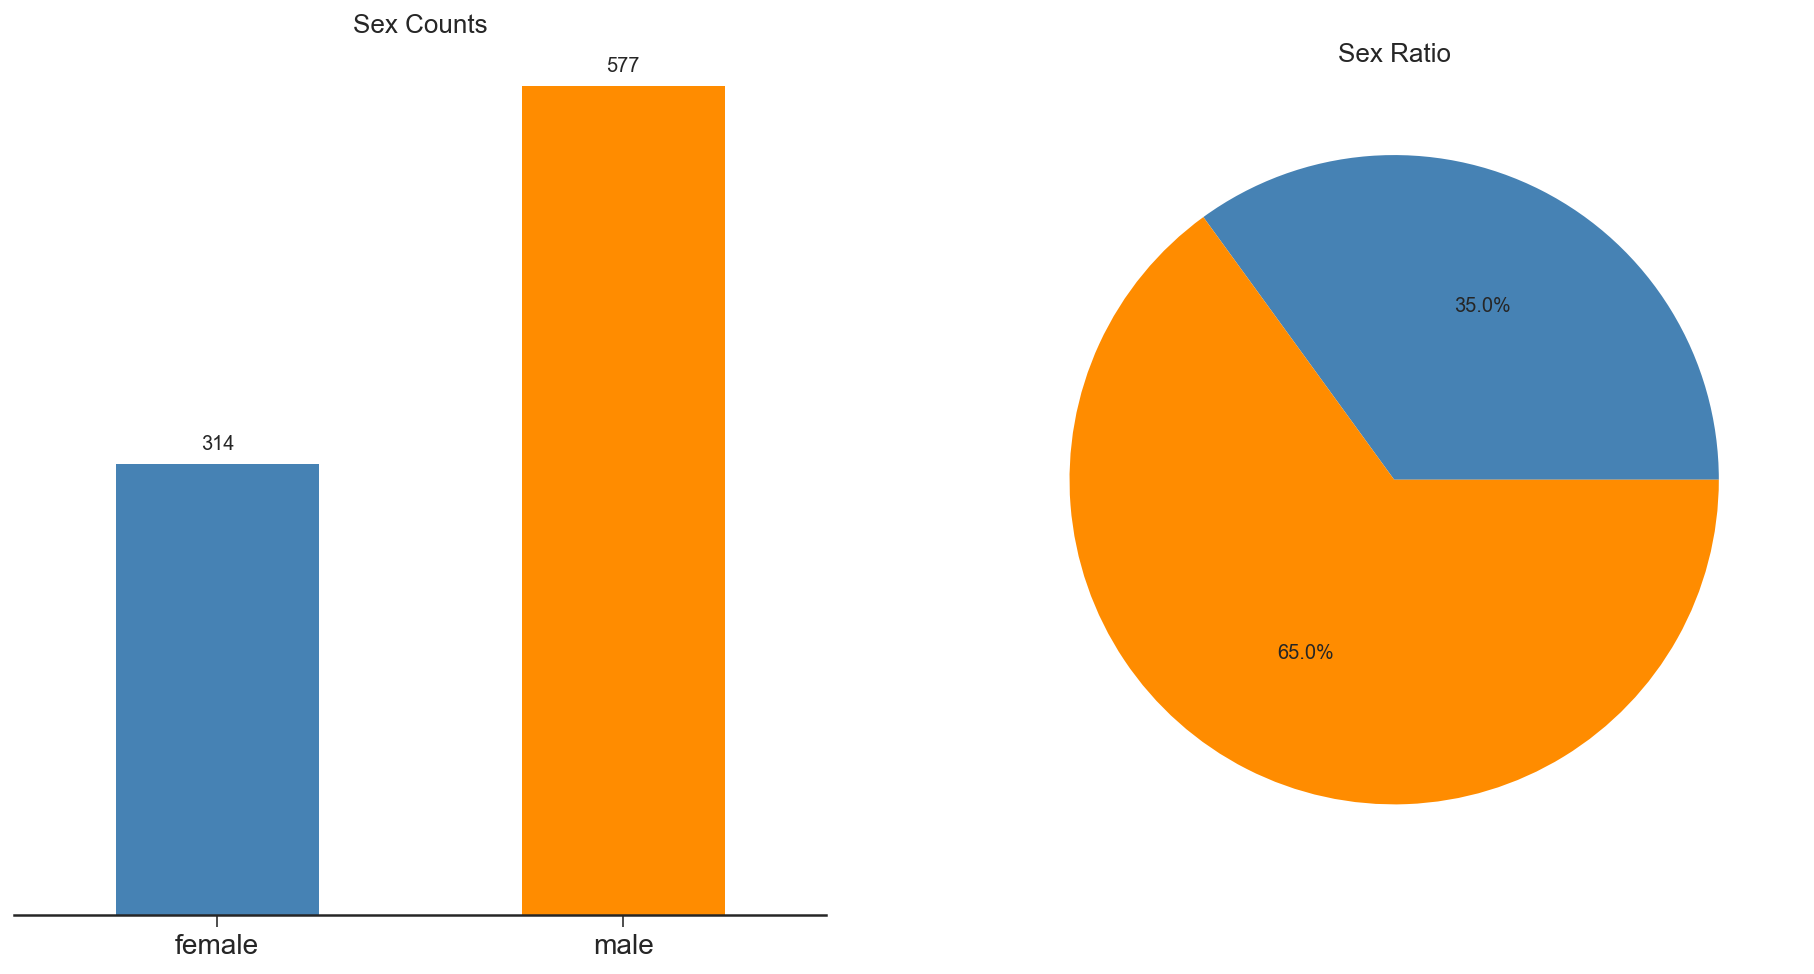

In [420]:
Groupby_OneCol_comp_plot(descript, 'Sex', color_palette = ('steelblue','darkorange'))

We can observe that there were many males on the ship than female.

### Correlation of Sex with Survived

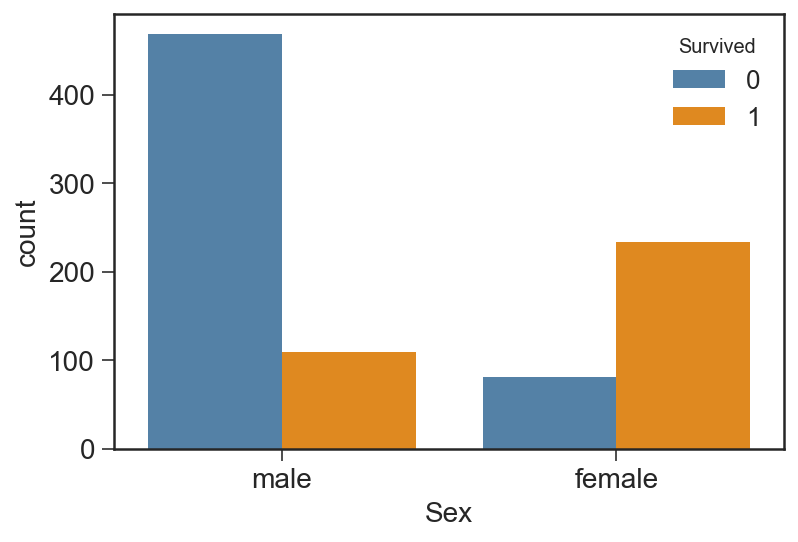

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
male      577
female    314
Name: Sex, dtype: int64


In [421]:
# Visualize with a countplot
sns.countplot(x="Sex", hue="Survived", data=train)
plt.show()

# Proportion of people survived for each class
print(train["Survived"].groupby(train["Sex"]).mean())

# How many people we have in each class?
print(train["Sex"].value_counts())

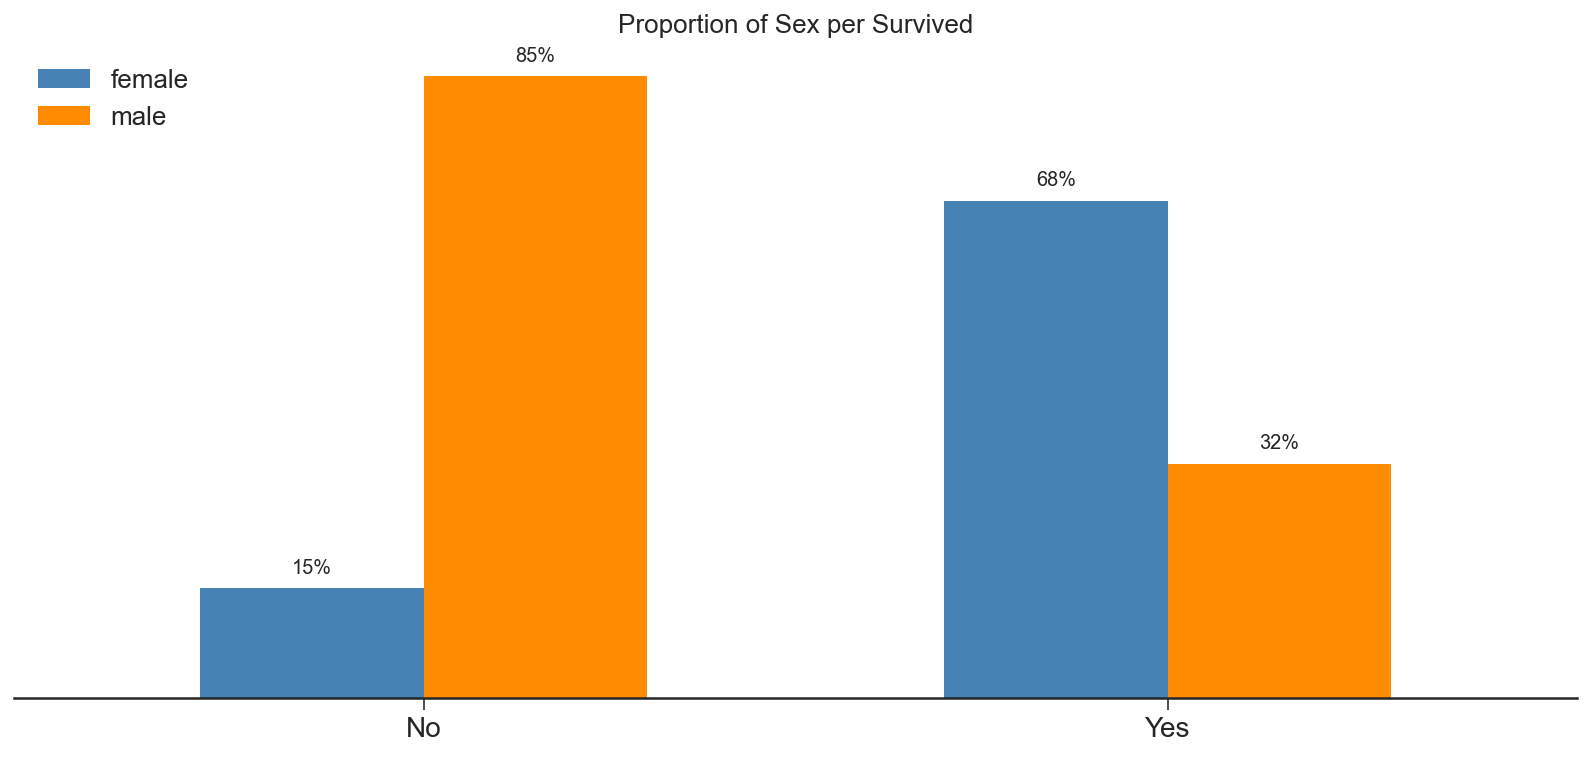

In [422]:
Groupby_TwoCol_Plot(descript,'Survived', 'Sex', color_palette=('steelblue','darkorange'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per Survived',
                   legloc='upper left')

Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

Obviously, there is a relationship between sex and surviving.

## SibSp & Parch

SibSp = Sibling or Spouse number <br>
Parch = Parent or Children number <br>

We decided to make a new feature called family size by summing the SibSp and Parch columns

In [423]:
print(train["SibSp"].value_counts())

print(train["Parch"].value_counts())

train["family_size"] = train["SibSp"] + train["Parch"]

print(train["family_size"].value_counts())

# Proportion of people survived for each class
print(train["Survived"].groupby(train["family_size"]).mean().sort_values(ascending=False))

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_size, dtype: int64
family_size
3     0.724138
2     0.578431
1     0.552795
6     0.333333
0     0.303538
4     0.200000
5     0.136364
7     0.000000
10    0.000000
Name: Survived, dtype: float64


Apparently, family size is important to survival. We are going to group them in feature engineering step like following <br>

**big family**  = if family size > 3 <br>
**small family** = if family size > 0 and family size < =3<br> 
**alone**   = family size == 0 <br>

This can be represented with a factorplot.

Factor plot for Family_Size (Count Feature) and Family Size.

c:\Users\KWAME\anaconda3\envs\project\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\KWAME\anaconda3\envs\project\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


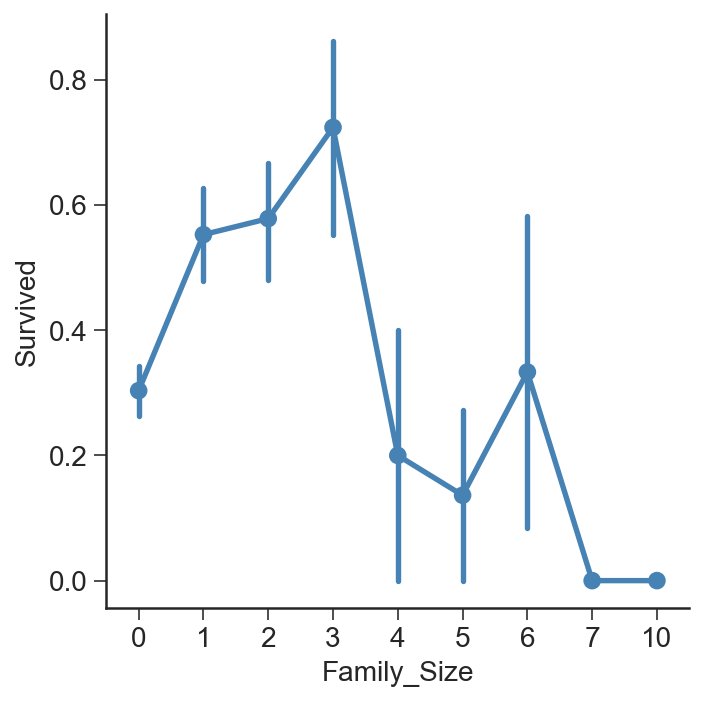

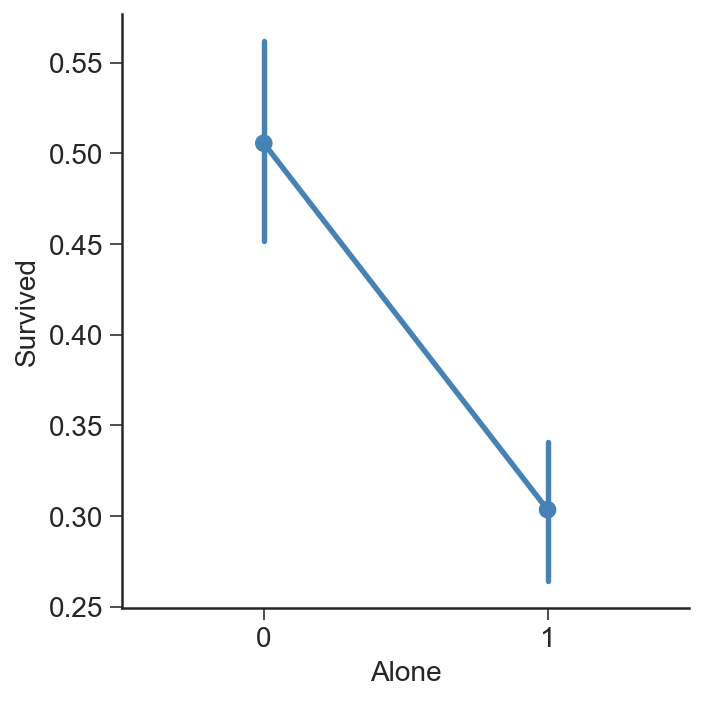

In [424]:
# Adding a column Family_Size
train['Family_Size'] = 0
train['Family_Size'] = train['Parch']+train['SibSp']

# Adding a column Alone
train['Alone'] = 0
train.loc[train.Family_Size == 0, 'Alone'] = 1
 
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = train)
 
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = train)

Family_Size exhibits the number of people in a passenger’s family. It is calculated by summing the **SibSp and Parch columns** of a respective passenger as shown above. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

We relevantly observed that:

If a passenger is alone, the survival rate is less.
If the family size is greater than 5, chances of survival decrease considerably. Hence, survival rates are dependant on the family size.

## Ticket

At first, we thought that we would drop this column but after exploration we found useful features.

In [425]:
# Print the first five rows of the Ticket column
print(train["Ticket"].head(15))

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object


we extracted only first letters of the tickets because we thought that they would indicate the ticket type.

In [426]:
# Get first letters of the tickets
train["Ticket_first"] = train["Ticket"].apply(lambda x: str(x)[0])

# Print value counts
print(train["Ticket_first"].value_counts())

# Surviving rates of first letters
print(train.groupby("Ticket_first")["Survived"].mean().sort_values(ascending=False))

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_first, dtype: int64
Ticket_first
9    1.000000
P    0.646154
1    0.630137
F    0.571429
2    0.464481
C    0.340426
S    0.323077
L    0.250000
3    0.239203
4    0.200000
6    0.166667
W    0.153846
7    0.111111
A    0.068966
5    0.000000
8    0.000000
Name: Survived, dtype: float64


The first letters of the tickets are correlated with surviving rate somehow. I am going to group them like following

**higher surviving rate**  = F, 1, P , 9 <br>
**neutral** = S, C, 2 <br> 
**lower surviving rate**   = else <br>

## Fare

We can plot a histogram to see Fare distribution

(-0.512, 170.776]     871
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: Fare, dtype: int64


c:\Users\KWAME\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


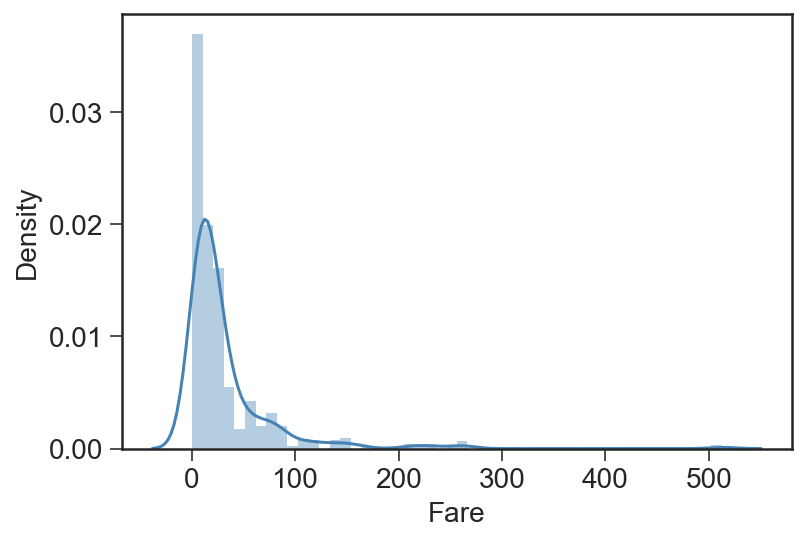

Fare
(-0.512, 170.776]     0.376579
(170.776, 341.553]    0.647059
(341.553, 512.329]    1.000000
Name: Survived, dtype: float64


In [427]:
# Print 3 bins of Fare column
print(pd.cut(train['Fare'], 3).value_counts())

# Plot the histogram
sns.distplot(train["Fare"])
plt.show()

# Print binned Fares by surviving rate
print(train['Survived'].groupby(pd.cut(train['Fare'], 3)).mean())

There is also a correlation between ticket fares and surviving

However, we can also use bar garph to further explore.

Since fare denotes the fare paid by a passenger and as the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. 

**N/B:** Usually it is ideal to measure continous variations with histograms as we did in the fare distribution above.

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

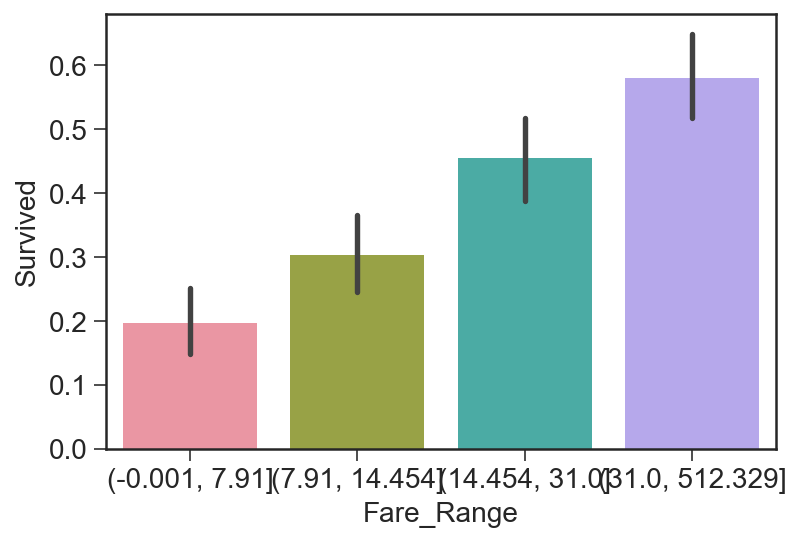

In [428]:
# Divide Fare into 4 bins
train['Fare_Range'] = pd.qcut(train['Fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = train)

It can be concluded that if a passenger paid a higher fare, the survival rate is more. First Class passengers paid more than second and third classes. 

## Cabin

In [429]:
# Print the unique values in the Cabin column
print(train["Cabin"].unique())

# Get the first letters of Cabins
train["Cabin_first"] = train["Cabin"].apply(lambda x: str(x)[0])

# Print value counts of first letters
print(train["Cabin_first"].value_counts())

# Surviving rate of Cabin first letters
print(train.groupby("Cabin_first")["Survived"].mean().sort_values(ascending=False))

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
n    687
C     59
B     47
D     33
E     3

According to surviving rates, we will group the Cabins like following

**higher surviving rate**  = D, E, B, F, C <br>
**neutral** = G, A<br> 
**lower surviving rate**   else <br>

In [430]:
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                    Name     Sex   Age  SibSp  \
0                                Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                                 Heikkinen, Miss. Laina  female  26.0      0   
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                               Allen, Mr. William Henry    male  35.0      0   
..                                                   ... 

## Embarked

Embarked is a categorical features which shows us the port of embarkation. <br>

C = Cherbourg, Q = Queenstown, S = Southampton

## Analysis of the Embarked variable.
We start with the composition of passengers based on their port of embarkation.

Total No. of Embarked:889


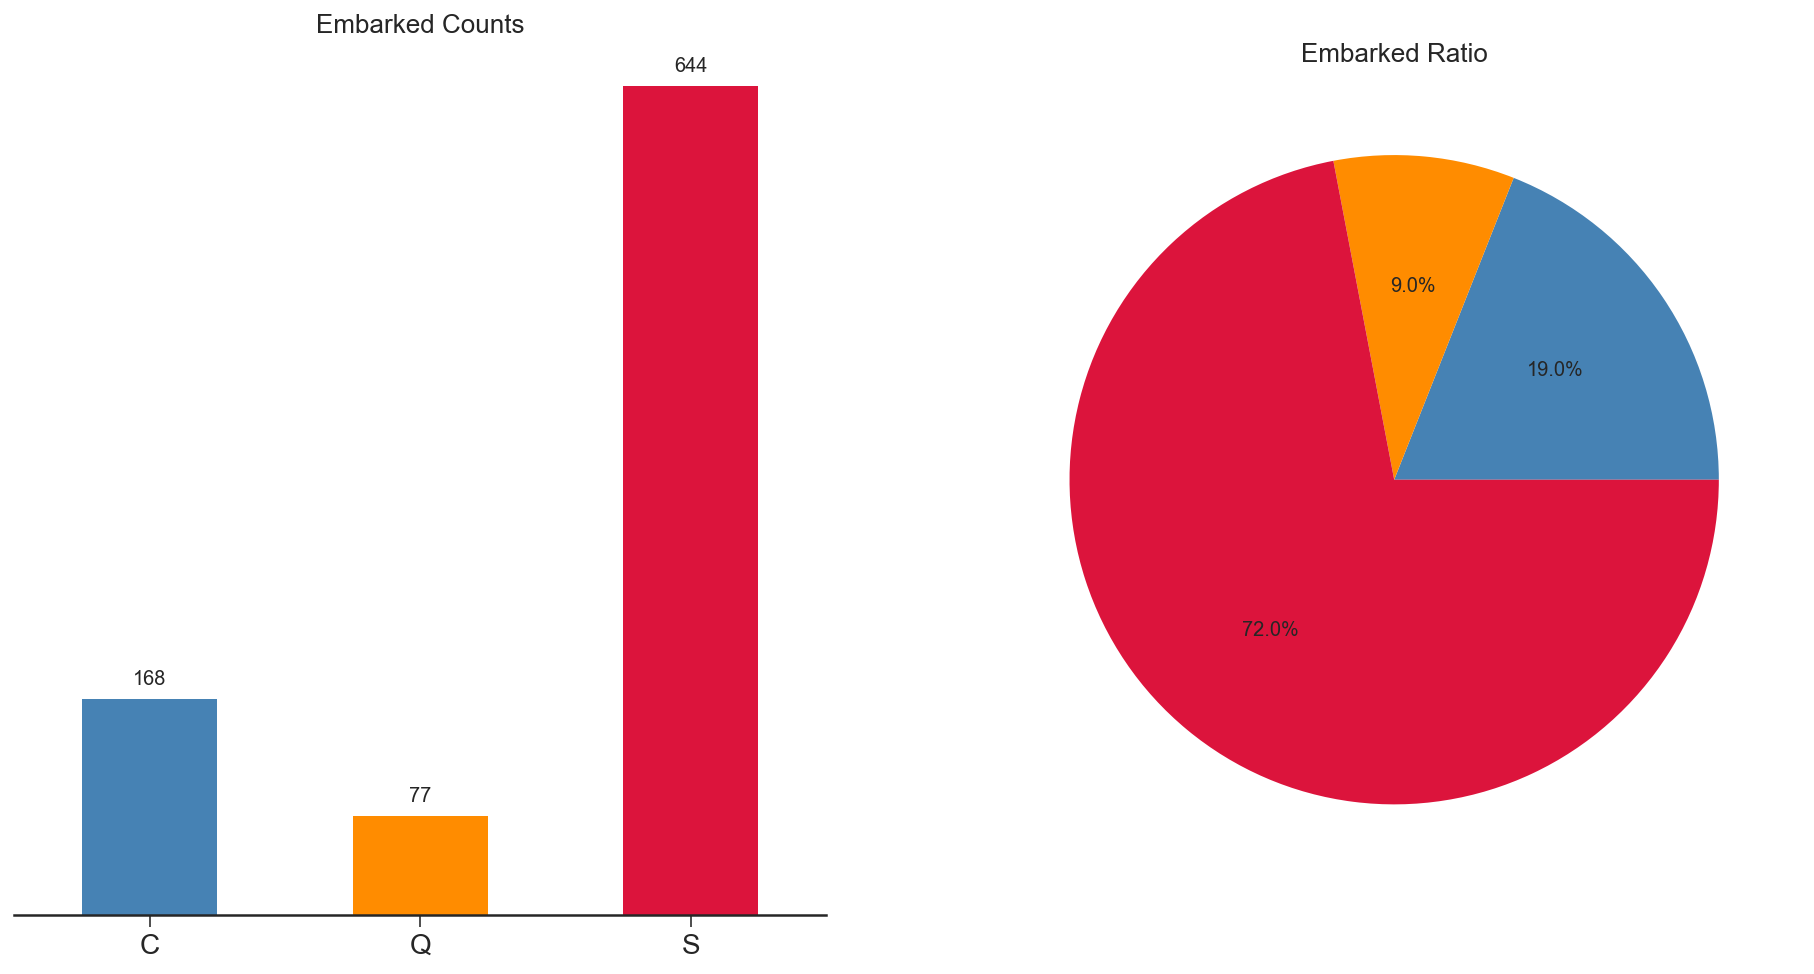

In [431]:
Groupby_OneCol_comp_plot(train, 'Embarked', color_palette = ('steelblue','darkorange', 'crimson'))

We see that the majority of passengers (644 of 889 - 72%) embarked in Southhampton and only 77 passengers - 9% - embarked in Queenstown

Let's examine the percentages of passengers that survived ,depending on their port of embarkation.

We will make functions for this operation since we will use for the other variables as well:

## Correlation of Survived with Embarked .

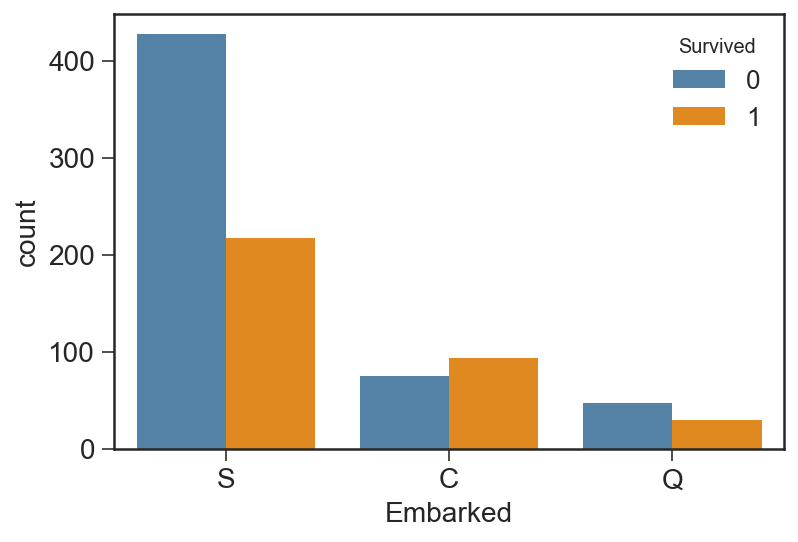

S    644
C    168
Q     77
Name: Embarked, dtype: int64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [432]:
# Make a countplot
sns.countplot(x="Embarked", hue="Survived", data=train)
plt.show()

# Print the value counts
print(train["Embarked"].value_counts())

# Surviving rates of Embarked
print(train["Survived"].groupby(train["Embarked"]).mean())

This can be further exploited using a sns.catplot 

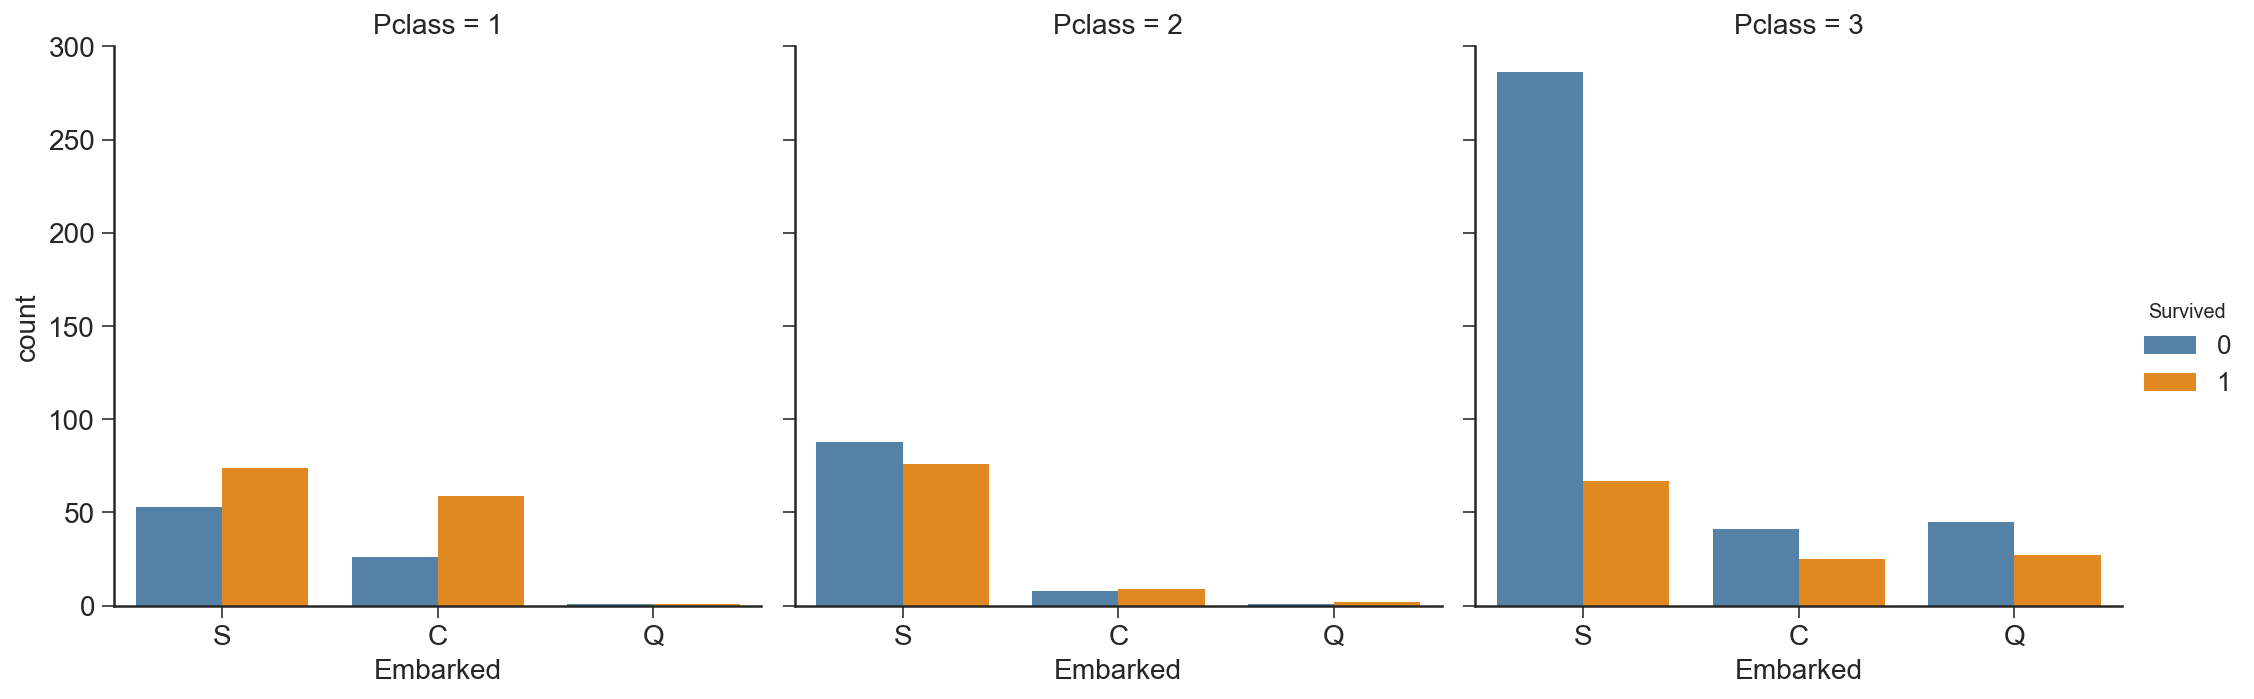

In [433]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train)

We can dig more to know the percentages of survival with Embarked.

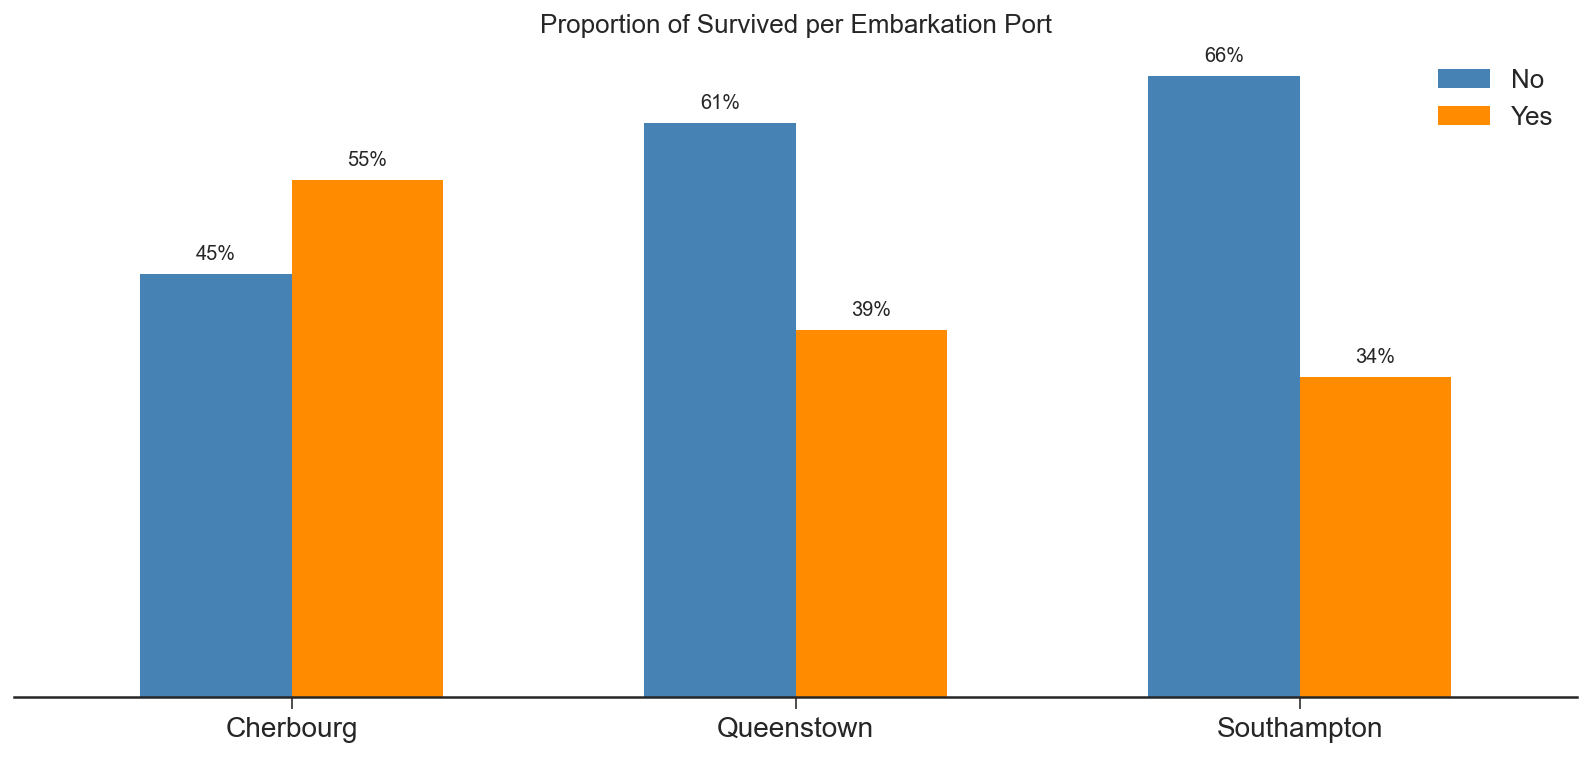

In [434]:
Groupby_TwoCol_Plot(descript,'Embarked', 'Survived', color_palette=('steelblue','darkorange'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Survived per Embarkation Port')

From our bar chat above, We could observe that 55% of passengers embarked in Cherbourg survived compared to 39% and 34% at Queensberg and Southampton respectively.

No doubt, Cherbourg has the higher surviving rate. We will definetely use this information.


## Correlation of Embarked with Pclass

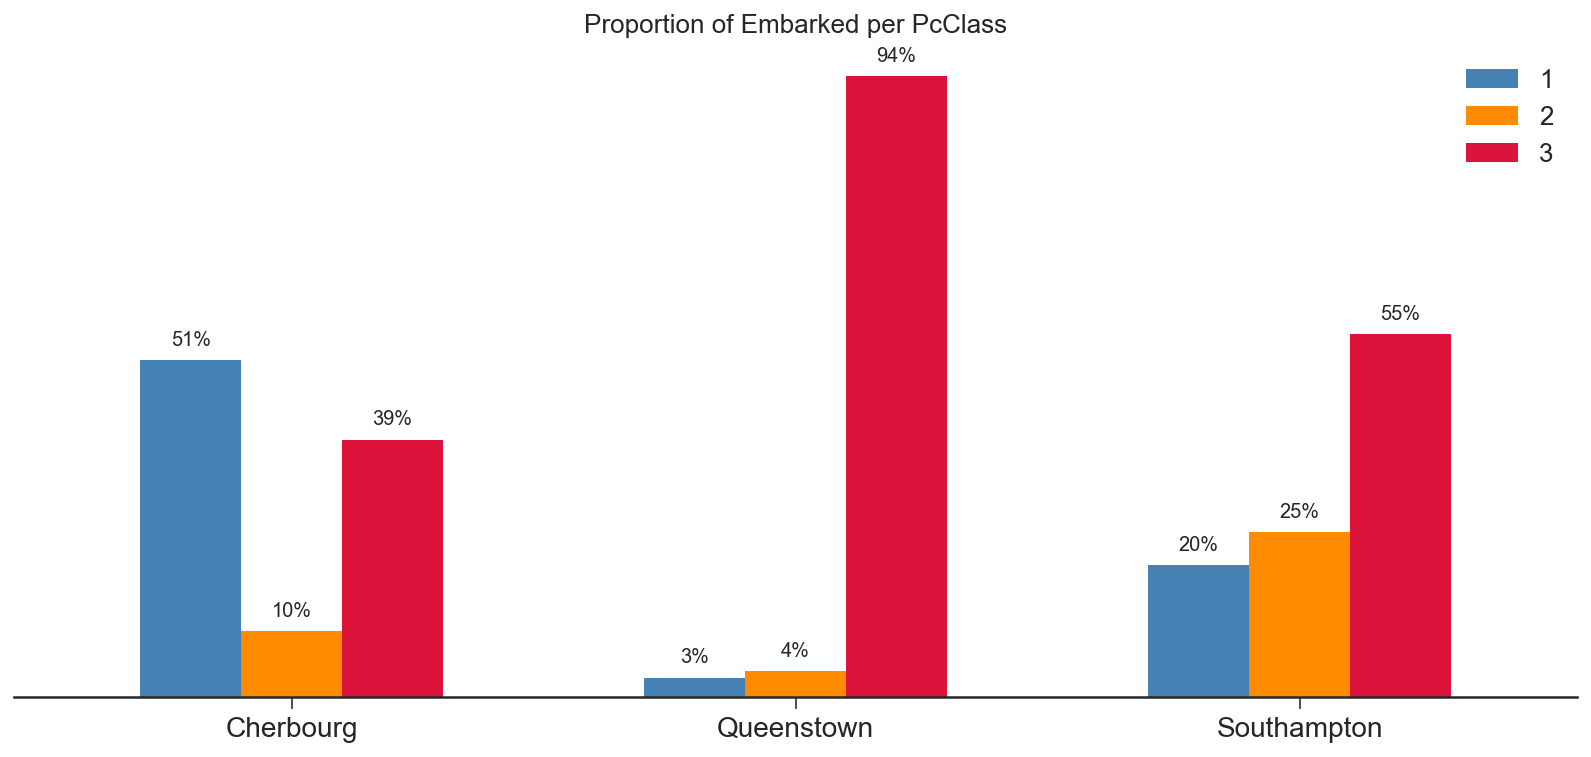

In [435]:
#Calculating percentages of port passengers per Class
Groupby_TwoCol_Plot(descript,'Embarked', 'Pclass', color_palette=('steelblue','darkorange', 'crimson'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Embarked per PcClass', sorter = [1,2,3])

51% of the passengers embarked in Cherbourg are in the 1st Pclass compared to 20% and 3% respectively for Southhampton and Queenstown.

It looks like the class may play a role in port of embarkation's relationship with survibability.


## Correlation of Embarked with Sex.

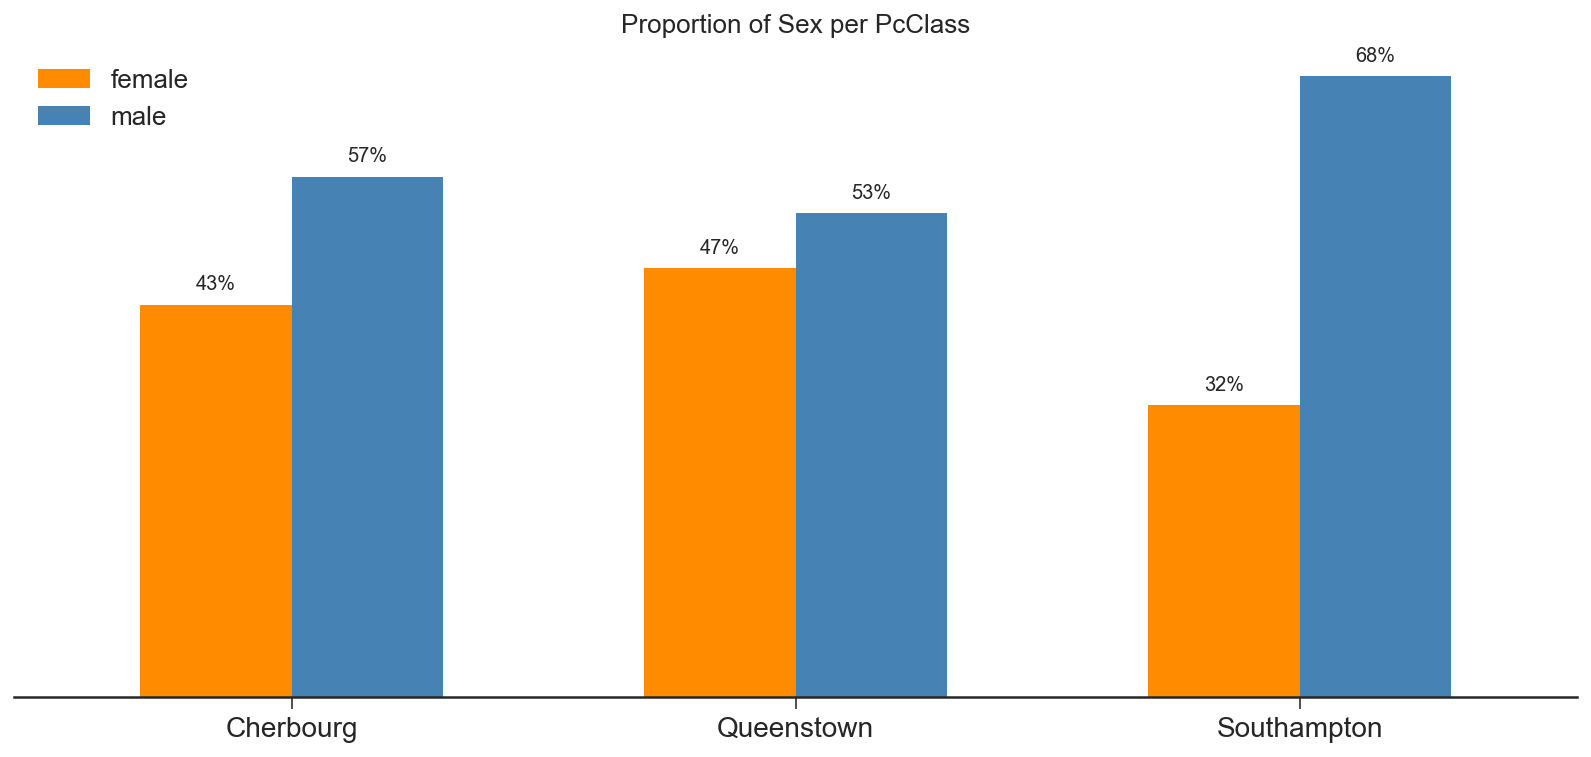

In [436]:
#Calculate percentages of port passengers per Sex
Groupby_TwoCol_Plot(descript,'Embarked', 'Sex', color_palette=('darkorange','steelblue'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per PcClass',
                   legloc='upper left')

We dicovered there were 68% of male passengers emabrked from Southampton which is more compared to 57% and 53% of male passengers emabrked from Cherbourg and Queenstown respectively.
Also, we discovered that 47% of females passengers embarked from Queenstown which is more compared to the 43% and 32% of female passengers from Cherbourg and Southampton respectively.
However, we couldnt find a clear survivability between Embarked and sex. 

# 2. Feature Engineering

### First dealing with our missing data

We have learned a lot from exploratory data analysis. Now we can start feature engineering. Firstly, let's load the train and the test sets.

In [437]:
# Load the train and the test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

There is one missing value in the Fare column of the test set. We imputed it by using mean.

In [438]:
# Put the mean into the missing value
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

Here, we decided to use the imputer from sciki-learn 

We have used two types of Imputer from sklearn. Iterative imputer for age imputation, and Simple imputer ( with most frequent strategy) for Embarked

In [439]:
# Imputers
imp_embarked = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_age = IterativeImputer(max_iter=100, random_state=34, n_nearest_features=2)

# Impute Embarked
train["Embarked"] = imp_embarked.fit_transform(train[["Embarked"]])
test["Embarked"] = imp_embarked.transform(test[["Embarked"]])

# Impute Age
train["Age"] = np.round(imp_age.fit_transform(train[["Age"]]))
test["Age"] = np.round(imp_age.transform(test[["Age"]]))

We also encode the sex column.

In [440]:
from sklearn.preprocessing import LabelEncoder

# Initialize a Label Encoder
le = LabelEncoder()

# Encode Sex
train["Sex"] = le.fit_transform(train[["Sex"]].values.ravel())
test["Sex"] = le.fit_transform(test[["Sex"]].values.ravel())

In EDA, we decided to use family size feature

In [441]:
# Family Size
train["Fsize"] = train["SibSp"] + train["Parch"]
test["Fsize"] = test["SibSp"] + test["Parch"]

Ticket first letters and Cabin first letters are also needed

In [442]:
# Ticket first letters
train["Ticket"] = train["Ticket"].apply(lambda x: str(x)[0])
test["Ticket"] = test["Ticket"].apply(lambda x: str(x)[0])

# Cabin first letters
train["Cabin"] = train["Cabin"].apply(lambda x: str(x)[0])
test["Cabin"] = test["Cabin"].apply(lambda x: str(x)[0])

Extract the titles from the names

In [443]:
# Titles
train["Title"] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test["Title"] = test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

Now, we need some helper functions to group our categories

In [444]:
# Group the family_size column
def assign_passenger_label(family_size):
    if family_size == 0:
        return "Alone"
    elif family_size <=3:
        return "Small_family"
    else:
        return "Big_family"
    
# Group the Ticket column
def assign_label_ticket(first):
    if first in ["F", "1", "P", "9"]:
        return "Ticket_high"
    elif first in ["S", "C", "2"]:
        return "Ticket_middle"
    else:
        return "Ticket_low"
    
# Group the Title column    
def assign_label_title(title):
    if title in ["the Countess", "Mlle", "Lady", "Ms", "Sir", "Mme", "Mrs", "Miss", "Master"]:
        return "Title_high"
    elif title in ["Major", "Col", "Dr"]:
        return "Title_middle"
    else:
        return "Title_low"
    
# Group the Cabin column  
def assign_label_cabin(cabin):
    if cabin in ["D", "E", "B", "F", "C"]:
        return "Cabin_high"
    elif cabin in ["G", "A"]:
        return "Cabin_middle"
    else:
        return "Cabin_low"

Applying the functions.

In [445]:
# Family size
train["Fsize"] = train["Fsize"].apply(assign_passenger_label)
test["Fsize"] = test["Fsize"].apply(assign_passenger_label)

# Ticket
train["Ticket"] = train["Ticket"].apply(assign_label_ticket)
test["Ticket"] = test["Ticket"].apply(assign_label_ticket)

# Title
train["Title"] = train["Title"].apply(assign_label_title)
test["Title"] = test["Title"].apply(assign_label_title)

# Cabin
train["Cabin"] = train["Cabin"].apply(assign_label_cabin)
test["Cabin"] = test["Cabin"].apply(assign_label_cabin)

Time to use One Hot Encoding

In [446]:
train = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Cabin","Title", "Fsize"], data=train, drop_first=True)
test = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Cabin", "Title", "Fsize"], data=test, drop_first=True)

Drop the colums that are no longer needed

In [447]:
target = train["Survived"]
train.drop(["Survived", "SibSp", "Parch", "Name", "PassengerId"], axis=1, inplace=True)
test.drop(["SibSp", "Parch", "Name","PassengerId"], axis=1, inplace=True)

Final look

In [448]:
display(train.head())
display(test.head())

,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle,Fsize_Big_family,Fsize_Small_family
0,1,22.0,7.2500,0,1,0,1,1,0,1,0,1,0,0,1
1,0,38.0,71.2833,0,0,0,0,0,0,0,0,0,0,0,1
2,0,26.0,7.9250,0,1,0,1,0,1,1,0,0,0,0,0
3,0,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,1
4,1,35.0,8.0500,0,1,0,1,1,0,1,0,1,0,0,0


,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle,Fsize_Big_family,Fsize_Small_family
0,1,34.0,7.8292,0,1,1,0,1,0,1,0,1,0,0,0
1,0,47.0,7.0000,0,1,0,1,1,0,1,0,0,0,0,1
2,1,62.0,9.6875,1,0,1,0,0,1,1,0,1,0,0,0
3,1,27.0,8.6625,0,1,0,1,1,0,1,0,1,0,0,0
4,0,22.0,12.2875,0,1,0,1,1,0,1,0,0,0,0,1


# 3. Machine Learning

In [449]:
from sklearn.model_selection import train_test_split

# Select the features and the target
X = train.values
y = target.values

# Split the data info training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

To evaluate our model's performance, we need to split our train data into training and test sets.

We have used GridSearchCV for tuning my Random Forest Classifier

In [450]:
# Initialize a RandomForestClassifier
clf = RandomForestClassifier(random_state=34)

clf.fit(X_train, y_train)

# Predict from the test set
y_pred = clf.predict(X_test)

# Print the accuracy with accuracy_score function
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.7653631284916201

Confusion Matrix

[[90 20]
 [22 47]]


We can visualise the importance of the features.

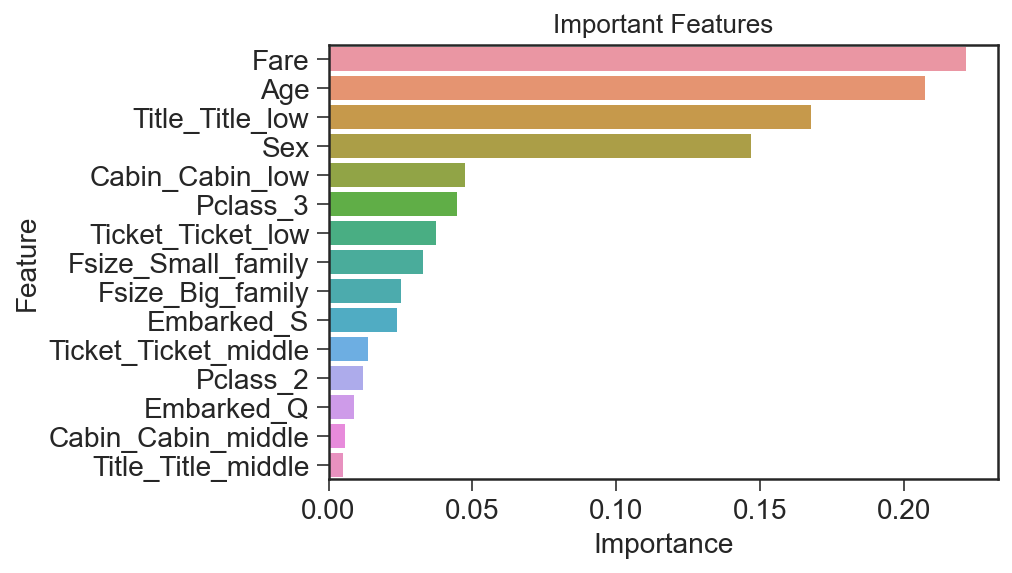

In [451]:
# Create a pandas series with feature importance
importance = pd.Series(clf.feature_importances_,index=train.columns).sort_values(ascending=False)

sns.barplot(x=importance, y=importance.index)
# Add labels to your graph
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Important Features")
plt.show()